<a id= "Start"></a>

![ICT%20Logo%20Full%20Colour.jpg](attachment:ICT%20Logo%20Full%20Colour.jpg)
<table class="table table-bordered">
    <tr>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## <u> Student Details
#### Name: Akul Arun
#### Student Number: S10243523
#### For: Data Wrangling Assignment 2 Project (Actual Code and Report)

# Code
### 1. [Loading and Exploring Tables](#part1)
### 2. [Prediction Problem and Table Assignment](#part2)
- 2.1. [Prediction Problem](#part2.1)
- 2.2. [Table Assignment](#part2.2)
### 3. [Data Cleaning in Individual Tables](#part3)
- 3.1. [Races_df](#part3.1)
- 3.2. [Results_df](#part3.2)
- 3.3. [Drivers_df](#part3.3)
- 3.4. [Constructors_df](#part3.4)
- 3.5. [Circuits_df](#part3.5)
### 4. [Data Wrangling](#part4)
- 4.1. [Extraction of Features](#part4.1)
- 4.2. [Creation of Features](#part4.2)
- 4.3. [Subsetting](#part4.3)
- 4.4. [Merging Dataframes](#part4.4)
- 4.5. [Creation of Target Feature and Other Additonal Features](#part4.5)
- 4.6. [Grouping](#part4.6)
- 4.7. [Converting Datatypes of Features](#part4.7)
### 5. [Data Exploration With Target Variable](#part5)
### 6. [Train-Test Split](#part6)
### 7. [Data Transformation](#part7)
- 7.1. [Missing value Imputation With Pipelines](#part7.1)
- 7.2. [Categorical Encoding](#part7.2)
- 7.3. [Numerical Transformation](#part7.3)
    - 7.3.1. [altitude](#part7.3.1)
- 7.4. [Dealing With Outliers](#part7.4)
    - 7.4.1. [altitude](#part7.4.1)
#### 7.5. [Binning](#part7.5)
### 8. [Feature Engineering](#part8)
- 8.1. [Scaling](#part8.1)
- 8.2. [Polynomial Expansion](#part8.2)
### 9. [Data Modelling](#part9)
- 9.1. [Naive Baseline Model](#part9.1)
- 9.2. [Logistic Regression Model (Actual Model)](#part9.2)
- 9.3. [Relative Feature Importance](#part9.3)

# Report
### 1. [Introduction with Value Based Problem Statement](#part10.1)
### 2. [Problem Formulation](#part10.2)   
   - [Loading and Exploring the Tables](#part10.2.1)
   - [Data Understanding](#part10.2.2)
   - [Prediction Problem](#part10.2.3)
### 3. [Data Wrangling on Multiple Tables](#part10.3)

   - [Data Cleaning](#part10.3.1)
   - [Subsetting Required Tables](#part10.3.2)
   - [Merging Dataframes](#part10.3.3)
   - [Feature Creation/Extraction](#part10.3.4)
   - [Grouping](#part10.3.5)

### 4. [Data Exploration With Target Variable](#part10.4)
### 5. [Train-Test Split](#part10.5)
### 6. [Data Cleansing and Transformation](#part10.6)

   - [Missing Value Imputation](#part10.6.1)
   - [Categorical Data Encoding](#part10.6.2)
   - [Numerical Data Transformation](#part10.6.3)
   - [Dealing With Outliers](#part10.6.4)
   - [Variable Binning and Discretization](#part10.6.5)
   - [Feature Scaling](#part10.6.6)
   - [Polynomial Expansion](#part10.6.7)


### 7. [Machine Learning Model](#part10.7)

   - [Naïve Baseline Model](#part10.7.1)
   - [Logistic Regression Model](#part10.7.2)


### 8. [Summary and Further Improvements](#part10.8)

# Code

In [1]:
# import the packages

# General packages
import pandas as pd
import numpy as np
from datetime import datetime
!pip install pandas requests beautifulsoup4
!pip install python-dateutil
import warnings
warnings.filterwarnings("ignore")
!pip install feature-engine

# Data Loading and Exploration Packages
import os
import glob
import ipywidgets as widgets
from IPython.display import display, clear_output

# Visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('seaborn')

# Train-Test Split
from sklearn.model_selection import train_test_split

# For Q-Q plots
import scipy.stats as stats

# Impute missing data with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Impute missing data with feature-engine
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer

# Transforming with feature-engine
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# Dealing with outliers with feature-engine
from feature_engine.outliers import Winsorizer

# Discretization with feature-engine
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, CountFrequencyEncoder
from sklearn.preprocessing import LabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

# Expansion
from sklearn.preprocessing import PolynomialFeatures

# Naive Baseline Accuracy
from sklearn.metrics import accuracy_score

# Actual Model Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Step 1: Loading and Exploring Tables <a id="part1"></a>

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
folder_path = "./datasets/f1db_csv_mod"
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

dataframes = {}
data_dictionaries = {}

# Importing CSV Files
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df_name = file.replace('mod.csv', 'df')
    dataframes[df_name] = pd.read_csv(file_path)  

# Load data dictionaries 
dict_folder_path = "./datasets/individual data dictionaries"
dict_files = [file for file in os.listdir(dict_folder_path) if file.endswith('_mod.txt')]

for dict_file in dict_files:
    dict_name = dict_file.split('_mod.txt')[0] + '_df'  # Extract the complete name from the data dictionary file
    with open(os.path.join(dict_folder_path, dict_file), 'r') as f:
        data_dictionaries[dict_name] = f.read()

In [4]:
# Create buttons for each dataframe
buttons = []
output = widgets.Output()  # Create an output widget to display results

def on_button_click(button):
    with output:
        clear_output()  # Clear previous output
        for b in buttons:
            if b == button:
                b.button_style = 'success'
            else:
                b.button_style = ''
        df = dataframes[button.description]
        data_dict = data_dictionaries[button.description]
        display(df.head(), df.info())
        print("Dataframe Shape:")
        print(df.shape)
        print("")
        print("Data Dictionary:")
        print(data_dict)

for key in dataframes.keys():
    button = widgets.Button(description=key, layout=widgets.Layout(width='200px', height='50px'))
    button.on_click(on_button_click)
    buttons.append(button)

# Arrange buttons in a specific layout
rows = []
row_buttons = []
for i, button in enumerate(buttons):
    row_buttons.append(button)
    if len(row_buttons) == 4 or i == len(buttons) - 1:
        rows.append(widgets.HBox(row_buttons))
        row_buttons = []

# Create the final layout 
layout = widgets.VBox(rows)

# Display buttons and output
display(layout)
display(output)

Output()

### Step 2: Prediction Problem & Table Selection <a id="part2"></a>

#### 2.1 Prediction Problem: <a id="part2.1"></a>

Through this machine learning model and the dataset provided, I wanted to predict which driver would win the podium in the next race. The reason why I decided to pick this prediction problem is because the podiums are one of the most important things in Formula 1 and many drivers dream of standing on the podium. There are many drivers who have not stepped on the podium before so it is a very special feat for drivers. To do this, I would be using a few of the dataframes that I have previously created. The dataframes that I will be using are results_df, races_df, constructors_df, drivers_df, circuits_df. 

#### 2.2 Table Assignment <a id="part2.2"></a>

In [5]:
# Assigning the required dataframes to global variables as previously it was stored in dataframes dictionary

results_df = dataframes['results_df']

races_df = dataframes['races_df'] 

drivers_df = dataframes['drivers_df']

constructors_df = dataframes['constructors_df']

circuits_df = dataframes['circuits_df']

laptimes_df = dataframes['lap_times_df']

### Step 3: Data Cleaning in Indivdual Tables <a id="part3"></a>

#### 3.1 Race_df <a id="part3.1"></a>

In [6]:
# Blank Values for races_df
races_df = races_df.replace(r'\\N', np.nan, regex=True)
races_df.isnull().mean()

raceId       0.000000
round        0.000000
circuitId    0.000000
name         0.000000
date         0.009259
time         0.676852
url          0.000000
dtype: float64

In [7]:
# Correcting certain values for date column from races_df
races_df["date"].head()

0    3/29/2009
1    4/5/12009
2    4/19/2009
3    4/26/2009
4    5/10/2009
Name: date, dtype: object

In [8]:
# Correcting the values with the extra 1 in front of the year
races_df['date'] = races_df['date'].astype(str)

# Function to adjust the year
def adjust_year(date_str):
    date_parts = date_str.split('/')
    if len(date_parts) == 3:
        month, day, year = date_parts
        if len(year) == 5 and year.startswith('1'):
            year = year[1:]  # Remove the extra '1' from the beginning of the year
            return f"{month}/{day}/{year}"
    return date_str

# Apply the adjust_year function to the 'date' column
races_df['date'] = races_df['date'].apply(adjust_year)

In [9]:
races_df['date'].head()

0    3/29/2009
1     4/5/2009
2    4/19/2009
3    4/26/2009
4    5/10/2009
Name: date, dtype: object

In [10]:
races_df['date'].unique()

array(['3/29/2009', '4/5/2009', '4/19/2009', ..., '10/30/2022',
       '11/13/2022', '11/20/2022'], dtype=object)

In [11]:
races_df[races_df["date"]=='nan']

raceId  round  circuitId                      name date      time  \
26        27     10         10         German Grand Prix  nan  12:00:00   
68        69     17         22       Japanese Grand Prix  nan  14:00:00   
104      105     16         17        Chinese Grand Prix  nan       NaN   
897      900      1          1     Australian Grand Prix  nan   6:00:00   
914      917     18         18      Brazilian Grand Prix  nan  16:00:00   
935      948      1          1     Australian Grand Prix  nan   5:00:00   
948      961     14         14        Italian Grand Prix  nan  12:00:00   
978      991      3         17        Chinese Grand Prix  nan   6:10:00   
1015    1028     19         69  United States Grand Prix  nan  19:10:00   
1047    1062     11         11      Hungarian Grand Prix  nan  13:00:00   

                                                              url  
26            http://en.wikipedia.org/wiki/2008_German_Grand_Prix  
68          http://en.wikipedia.org/wiki/2006_Japanese_Grand_Prix  
104          http://en.wikipedia.org/wiki/2004_Chinese_Grand_Prix  
897      https://en.wikipedia.org/wiki/2014_Australian_Grand_Prix  
914        http://en.wikipedia.org/wiki/2014_Brazilian_Grand_Prix  
935      https://en.wikipedia.org/wiki/2016_Australian_Grand_Prix  
948         https://en.wikipedia.org/wiki/2016_Italian_Grand_Prix  
978         https://en.wikipedia.org/wiki/2018_Chinese_Grand_Prix  
1015  https://en.wikipedia.org/wiki/2019_United_States_Grand_Prix  
1047       http://en.wikipedia.org/wiki/2021_Hungarian_Grand_Prix

#### Identifying a pattern

#### Example 1

In [12]:
raceid_27 = races_df[races_df["raceId"]==27]
raceid_27

raceId  round  circuitId               name date      time  \
26      27     10         10  German Grand Prix  nan  12:00:00   

                                                    url  
26  http://en.wikipedia.org/wiki/2008_German_Grand_Prix

In [13]:
raceid_28 = races_df[races_df["raceId"]==28]
raceid_28

raceId  round  circuitId                  name      date      time  \
27      28     11         11  Hungarian Grand Prix  8/3/2008  12:00:00   

                                                       url  
27  http://en.wikipedia.org/wiki/2008_Hungarian_Grand_Prix

#### Example 2

In [14]:
raceid_897 = races_df[races_df["raceId"]==897]
raceid_897

raceId  round  circuitId                  name       date      time  \
894     897     17         24  Abu Dhabi Grand Prix  11/3/2013  13:00:00   

                                                        url  
894  http://en.wikipedia.org/wiki/2013_Abu_Dhabi_Grand_Prix

In [15]:
raceid_898 = races_df[races_df["raceId"]==898]
raceid_898

raceId  round  circuitId                      name        date      time  \
895     898     18         69  United States Grand Prix  11/17/2013  19:00:00   

                                                            url  
895  http://en.wikipedia.org/wiki/2013_United_States_Grand_Prix

#### Outlier of Pattern

In [16]:
raceid_1062 = races_df[races_df["raceId"]==1062]
raceid_1062

raceId  round  circuitId                  name date      time  \
1047    1062     11         11  Hungarian Grand Prix  nan  13:00:00   

                                                         url  
1047  http://en.wikipedia.org/wiki/2021_Hungarian_Grand_Prix

In [17]:
raceid_1063 = races_df[races_df["raceId"]==1063]
raceid_1063

raceId  round  circuitId                name       date      time  \
1048    1063     12         13  Belgian Grand Prix  8/29/2021  13:00:00   

                                                       url  
1048  http://en.wikipedia.org/wiki/2021_Belgian_Grand_Prix

In [18]:
# Replacing the 10 Missing values for date
from datetime import timedelta

# Convert the 'Date' column to datetime format
races_df['date'] = pd.to_datetime(races_df['date'], format='%m/%d/%Y')

for index, row in races_df.iterrows():
    if pd.isnull(row['date']):
        prev_date = races_df.at[index - 1, 'date']
        next_date = races_df.at[index + 1, 'date']
        

        if row['raceId'] == 1062:
            new_date = prev_date + timedelta(days=28)
        else:
            new_date = prev_date + timedelta(days=14)
        
        races_df.at[index, 'date'] = new_date

races_df[races_df["date"]=='nan']

Empty DataFrame
Columns: [raceId, round, circuitId, name, date, time, url]
Index: []

In [19]:
# Renaming races_df features
races_df = races_df.rename(columns={'name':'GP_name'})
races_df.columns

Index(['raceId', 'round', 'circuitId', 'GP_name', 'date', 'time', 'url'], dtype='object')

#### 3.2 Results_df <a id="part3.2"></a>

In [20]:
# Blank Values for results_df
results_df = results_df.replace(r'\\N', np.nan, regex=True)
results_df.isnull().mean()

resultId           0.000000
raceId             0.000000
driverId           0.000000
constructorId      0.000000
number             0.000236
grid               0.000000
position           0.424662
positionText       0.000000
positionOrder      0.000000
points             0.000000
laps               0.000000
time               0.731919
milliseconds       0.731958
fastestLap         0.726249
rank               0.718493
fastestLapTime     0.726249
fastestLapSpeed    0.726249
statusId           0.000000
dtype: float64

In [21]:
results_df.shape

(25399, 18)

In [22]:
# Blank Values for laptimes_df
laptimes_df = laptimes_df.replace(r'\\N', np.nan, regex=True)
laptimes_df.isnull().mean()

raceId          0.0
driverId        0.0
lap             0.0
position        0.0
time            0.0
milliseconds    0.0
dtype: float64

In [23]:
# I want to get the total laptime each driver took for each race and their lowest laptime so I decided to create a new df
new_laptimes_df = laptimes_df[['raceId','driverId','milliseconds']]

new_laptimes_df['racelaptime_milli'] = new_laptimes_df.groupby(['raceId', 'driverId'])['milliseconds'].transform('sum')

# Fastest race laptime
new_laptimes_df['fastestlap_milli'] = new_laptimes_df.groupby(['raceId', 'driverId'])['milliseconds'].transform('min')
new_laptimes_df = new_laptimes_df.drop('milliseconds',axis=1)
new_laptimes_df = new_laptimes_df.drop_duplicates()
new_laptimes_df.head()

raceId  driverId  racelaptime_milli  fastestlap_milli
0       841        20            5370259             89844
58      841         1            5392556             90314
116     841        17            5408430             89600
174     841       808            5400819             90064
232     841        13            5455445             88947

In [24]:
new_laptimes_df.shape

(9717, 4)

In [25]:
# Replace milliseconds feature in results_df with racelaptime_milli and fastLaptime feature with fastestlap_milli
results_df = pd.merge(results_df,new_laptimes_df,how='inner',on=['raceId','driverId'])

results_df = results_df.drop(['milliseconds','fastestLapTime'],axis=1)
results_df.isnull().mean()

resultId             0.000000
raceId               0.000000
driverId             0.000000
constructorId        0.000000
number               0.000000
grid                 0.000000
position             0.225481
positionText         0.000000
positionOrder        0.000000
points               0.000000
laps                 0.000000
time                 0.562416
fastestLap           0.284759
rank                 0.278275
fastestLapSpeed      0.284759
statusId             0.000000
racelaptime_milli    0.000000
fastestlap_milli     0.000000
dtype: float64

In [26]:
results_df.shape

(9717, 18)

In [27]:
# Incorrect Value Imputation for positionText of Results Table
results_df['positionText'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'R', 'D', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '99', '20', '21',
       'N', '22', '23', '24', 'E'], dtype=object)

In [28]:
# As seen, there is are values for '99' which should be incorrect as there has never been 99 drivers in formula 1.
results_df[results_df['positionText']=='99']

resultId  raceId  driverId  constructorId number  grid position  \
255        269      31        20              5     15     1       99   
275        289      32         4              4      5    15       99   
295        309      33         4              4      5     4       99   
314        329      34         1              1     22     1       99   
352        369      36         8              6      6     1       99   
...        ...     ...       ...            ...    ...   ...      ...   
9620     25306    1070       830              9     33     3       99   
9638     25326    1071         1            131     44    10       99   
9658     25346    1051         1            131     44     1       99   
9678     25366    1072         1            131     44     1       99   
9698     25386    1073       830              9     33     1       99   

     positionText  positionOrder  points  laps     time fastestLap rank  \
255            99             99    10.0    53  26:47.5         53   14   
275            99             99    10.0    61  57:16.3         55    3   
295            99             99    10.0    67  30:21.9         41    3   
314            99             99    10.0    56  31:57.4         13    1   
352            99             99    10.0    58  25:28.8         41    1   
...           ...            ...     ...   ...      ...        ...  ...   
9620           99             99    25.0    71  38:39.1         52    2   
9638           99             99    25.0    71  32:22.9         46    2   
9658           99             99    25.0    57  24:28.5         50    2   
9678           99             99    26.0    50  06:15.1         47    1   
9698           99             99    26.0    58  30:17.3         39    1   

     fastestLapSpeed  statusId  racelaptime_milli  fastestlap_milli  
255          230.414         1            5207494             90510  
275          172.464         1            7036304            105768  
295          207.668         1            5421892             79101  
314          203.722         1            5517403             96325  
352          223.978         1            5128770             85235  
...              ...       ...                ...               ...  
9620         196.134         1            5919086             78999  
9638         215.503         1            5542851             71982  
9658         227.633         1            5068471             85084  
9678         244.962         1            7575118             90734  
9698           220.8         1            5417345             86103  

[70 rows x 18 columns]

In [29]:
results_df[results_df['raceId']==31]

resultId  raceId  driverId  constructorId number  grid position  \
255       269      31        20              5     15     1       99   
256       270      31         5              1     23     2        2   
257       271      31         9              2      4    11        3   
258       272      31         4              4      5     8        4   
259       273      31         2              2      3    10        5   
260       274      31        13              6      2     6        6   
261       275      31         1              1     22    15        7   
262       276      31        17              9     10     3        8   
263       277      31         8              6      1    14        9   
264       278      31        12              4      6    17       10   
265       279      31        10              7     12     9       11   
266       280      31         6              3      8    18       12   
267       281      31        15              7     11     7       13   
268       282      31         3              3      7     5       14   
269       283      31        18             11     16    19       15   
270       284      31        14              9      9    13       16   
271       285      31        22             11     17    16       17   
272       286      31         7              5     14     4       18   
273       287      31        16             10     20    20       19   
274       288      31        21             10     21    12      NaN   

    positionText  positionOrder  points  laps       time fastestLap rank  \
255           99             99    10.0    53    26:47.5         53   14   
256            2              2     8.0    53     12.512         53   13   
257            3              3     6.0    53     20.471         52   12   
258            4              4     5.0    53     23.903         51    9   
259            5              5     4.0    53     27.748         53    6   
260            6              6     3.0    53     28.816         52    4   
261            7              7     2.0    53     29.912         52    5   
262            8              8     1.0    53     32.048         52    3   
263            9              9     0.0    53     39.468         53    1   
264           10             10     0.0    53     54.445         53   16   
265           11             11     0.0    53     58.888         53    8   
266           12             12     0.0    53  +1:02.015         53   11   
267           13             13     0.0    53  +1:05.954         52   15   
268           14             14     0.0    53  +1:08.635         53   10   
269           15             15     0.0    53  +1:13.370         52    7   
270           16             16     0.0    52        NaN         49   17   
271           17             17     0.0    52        NaN         42   19   
272           18             18     0.0    52        NaN         52    2   
273           19             19     0.0    51        NaN         51   18   
274            R             20     0.0    11        NaN          6   20   

    fastestLapSpeed  statusId  racelaptime_milli  fastestlap_milli  
255         230.414         1            5207494             90510  
256          230.95         1            5220006             90300  
257         230.955         1            5227965             90298  
258          231.82         1            5231397             89961  
259         232.217         1            5235242             89807  
260         232.505         1            5236310             89696  
261          232.44         1            5237406             89721  
262         232.544         1            5239542             89681  
263         236.859         1            5246962             88047  
264          229.38         1            5261939             90918  
265         231.853         1            5266382             89948  
266         231.167         1            5269509             90215 

In [30]:
results_df[results_df['raceId']==1070]

resultId  raceId  driverId  constructorId number  grid position  \
9620     25306    1070       830              9     33     3       99   
9621     25307    1070         1            131     44     2        2   
9622     25308    1070       815              9     11     4        3   
9623     25309    1070       842            213     10     5        4   
9624     25310    1070       844              6     16     8        5   
9625     25311    1070       832              6     55     6        6   
9626     25312    1070        20            117      5     9        7   
9627     25313    1070         8             51      7    10        8   
9628     25314    1070         4            214     14    12        9   
9629     25315    1070       846              1      4    18       10   
9630     25316    1070       841             51     99    11       11   
9631     25317    1070       817              1      3     7       12   
9632     25318    1070       839            214     31    19       13   
9633     25319    1070       840            117     18    20       14   
9634     25320    1070       822            131     77     1       15   
9635     25321    1070       847              3     63    16       16   
9636     25322    1070       849              3      6    13       17   
9637     25323    1070       853            210      9    15       18   

     positionText  positionOrder  points  laps       time fastestLap rank  \
9620           99             99    25.0    71    38:39.1         52    2   
9621            2              2    18.0    71     16.555         66    4   
9622            3              3    15.0    71     17.752         49    3   
9623            4              4    12.0    71  +1:03.845         66    7   
9624            5              5    10.0    71  +1:21.037         63    9   
9625            6              6     8.0    70        NaN         63    5   
9626            7              7     6.0    70        NaN         70    6   
9627            8              8     4.0    70        NaN         63   11   
9628            9              9     2.0    70        NaN         54   10   
9629           10             10     1.0    70        NaN         67    8   
9630           11             11     0.0    70        NaN         68   16   
9631           12             12     0.0    70        NaN         40   13   
9632           13             13     0.0    70        NaN         67   14   
9633           14             14     0.0    69        NaN         61   12   
9634           15             15     0.0    69        NaN         69    1   
9635           16             16     0.0    69        NaN         61   18   
9636           17             17     0.0    69        NaN         66   17   
9637           18             18     0.0    68        NaN         61   15   

     fastestLapSpeed  statusId  racelaptime_milli  fastestlap_milli  
9620         196.134         1            5919086             78999  
9621         194.116         1            5935641             79820  
9622         194.976         1            5936838             79468  
9623         192.453         1            5982931             80510  
9624         192.083         1            6000123             80665  
9625         193.484        11            5921516             80081  
9626         192.572        11            5929144             80460  
9627         191.969        11            5934245             80713  
9628         191.973        11            5942775             80711  
9629         192.197        11            5945312             80617  
9630         190.061        11            5980085             81523  
9631         191.126        11            5980975             81069  
9632          190.47        11            5992459             81348  
9633         191.454        12            5927037             80930  
9634         199.223        12            5952019             77774  
9635         188.919        12    

In [31]:
# Looking at the results for raceId 31 and 1070, we can see a pattern that the '99' values for positionText should be '1'.
results_df['positionText'] = results_df['positionText'].replace('99', '1')
results_df['positionText'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'R', 'D', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'N',
       '22', '23', '24', 'E'], dtype=object)

In [32]:
# Renaming results_df features
results_df = results_df.rename(columns={'grid':'qual_pos'})
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'qual_pos',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'fastestLap', 'rank', 'fastestLapSpeed', 'statusId',
       'racelaptime_milli', 'fastestlap_milli'],
      dtype='object')

#### 3.3 Drivers_df <a id="part3.3"></a>

In [33]:
# Blank Values for drivers_df
drivers_df = drivers_df.replace(r'\\N', np.nan, regex=True)
drivers_df.isnull().mean()

driverId       0.000000
driverRef      0.000000
number         0.941452
code           0.886417
forename       0.000000
surname        0.000000
dob            0.000000
nationality    0.000000
url            0.000000
dtype: float64

In [34]:
# Changing Datatype of dob in drivers table
drivers_df['dob'] = pd.to_datetime(drivers_df['dob'])

In [35]:
# Renaming name and nationality columns
drivers_df = drivers_df.rename(columns={'nationality':'driverNationality'})
drivers_df.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'driverNationality', 'url'],
      dtype='object')

#### 3.4 Constructors_df <a id="part3.4"></a>

In [36]:
# Blank Values for constructors_df
constructors_df = constructors_df.replace(r'\\N', np.nan, regex=True)
constructors_df.isnull().mean()

constructorId     0.0
constructorRef    0.0
name              0.0
nationality       0.0
url               0.0
dtype: float64

In [37]:
# Renaming name and nationality columns
constructors_df = constructors_df.rename(columns={'name':'constructor','nationality':'constructorNationality'})
constructors_df.columns

Index(['constructorId', 'constructorRef', 'constructor',
       'constructorNationality', 'url'],
      dtype='object')

#### 3.5 Circuits_df <a id="part3.5"></a>

In [38]:
# Blank Values for circuits_df
circuits_df = circuits_df.replace(r'\\N', np.nan, regex=True)
circuits_df.isnull().mean()

circuitId     0.000000
circuitRef    0.000000
name          0.000000
location      0.000000
country       0.000000
lat           0.000000
lng           0.000000
alt           0.025316
url           0.000000
dtype: float64

In [39]:
# Renaming country feature
circuits_df = circuits_df.rename(columns={'country':'GP_country','alt':'altitude'})
circuits_df.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'GP_country', 'lat',
       'lng', 'altitude', 'url'],
      dtype='object')

### Step 4: Data Wrangling <a id="part4"></a>

#### 4.1: Extraction of Features <a id="part4.1"></a>

In [40]:
# Creating year column in races_df
races_df['year'] = pd.to_datetime(races_df['date'], format='%d/%m/%Y').dt.year

In [41]:
# Creating month column in races_df
races_df['month'] = pd.to_datetime(races_df['date'], format='%d/%m/%Y').dt.month

In [42]:
# Creating season column in races_df
def get_season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'

races_df['season'] = races_df['month'].apply(get_season)

In [43]:
# Creating day column in races_df
races_df['day'] = pd.to_datetime(races_df['date'], format='%d/%m/%Y').dt.day

#### 4.2: Creation of Features <a id="part4.2"></a>

In [44]:
# creating a driver age feature

# drivers_df['age_at_race'] = abs(drivers_df['dob'] - races_df['date']).dt.days / 365
# drivers_df['age_at_race'] = drivers_df['age_at_race'].apply(lambda x: str(x))
drivers_df['age_at_race'] = (abs(drivers_df['dob'] - races_df['date']).dt.days / 365).apply(np.ceil).astype(str)

In [45]:
# Creating Driver Names
drivers_df['driver'] = drivers_df['forename']+' '+drivers_df['surname']
drivers_df = drivers_df.drop(['forename','surname'],axis=1)
drivers_df.head()

driverId   driverRef number code        dob driverNationality  \
0         1    hamilton     44  HAM 1985-01-07           British   
1         2    heidfeld    NaN  HEI 1977-05-10            German   
2         3     rosberg      6  ROS 1985-06-27            German   
3         4      alonso     14  ALO 1981-07-29           Spanish   
4         5  kovalainen    NaN  KOV 1981-10-19           Finnish   

                                              url age_at_race  \
0     http://en.wikipedia.org/wiki/Lewis_Hamilton        25.0   
1      http://en.wikipedia.org/wiki/Nick_Heidfeld        32.0   
2       http://en.wikipedia.org/wiki/Nico_Rosberg        24.0   
3    http://en.wikipedia.org/wiki/Fernando_Alonso        28.0   
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen        28.0   

              driver  
0     Lewis Hamilton  
1      Nick Heidfeld  
2       Nico Rosberg  
3    Fernando Alonso  
4  Heikki Kovalainen

In [46]:
# Check for Driver and constructor Error DNF (Looking at Status Table)
# 0-dnf, 1-finish
results_df['driver_error_dnf'] = results_df['statusId'].apply(lambda x: 0 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 1)
results_df['constructor_error_dnf'] = results_df['statusId'].apply(lambda x: 0 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 1)
results_df[['driverId','raceId','driver_error_dnf','constructor_error_dnf']]

driverId  raceId  driver_error_dnf  constructor_error_dnf
0            1      18                 1                      1
1            2      18                 1                      1
2            3      18                 1                      1
3            4      18                 1                      1
4            5      18                 1                      1
...        ...     ...               ...                    ...
9712       815    1073                 1                      0
9713       849    1073                 0                      1
9714       841    1073                 1                      0
9715       847    1073                 1                      0
9716         8    1073                 1                      0

[9717 rows x 4 columns]

#### 4.3: Subsetting <a id="part4.3"></a>

#### results_df

In [47]:
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'qual_pos',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'fastestLap', 'rank', 'fastestLapSpeed', 'statusId',
       'racelaptime_milli', 'fastestlap_milli', 'driver_error_dnf',
       'constructor_error_dnf'],
      dtype='object')

In [48]:
results_df = results_df.drop(['resultId','number','position','positionOrder', 'points',
                              'laps','time','fastestLap','rank','fastestLapSpeed','statusId'],axis=1)
results_df.columns

Index(['raceId', 'driverId', 'constructorId', 'qual_pos', 'positionText',
       'racelaptime_milli', 'fastestlap_milli', 'driver_error_dnf',
       'constructor_error_dnf'],
      dtype='object')

#### races_df

In [49]:
races_df.columns

Index(['raceId', 'round', 'circuitId', 'GP_name', 'date', 'time', 'url',
       'year', 'month', 'season', 'day'],
      dtype='object')

In [50]:
races_df = races_df.drop(['round','time','url'],axis=1)
races_df.columns

Index(['raceId', 'circuitId', 'GP_name', 'date', 'year', 'month', 'season',
       'day'],
      dtype='object')

#### drivers_df

In [51]:
drivers_df.columns

Index(['driverId', 'driverRef', 'number', 'code', 'dob', 'driverNationality',
       'url', 'age_at_race', 'driver'],
      dtype='object')

In [52]:
drivers_df = drivers_df.drop(['driverRef','number','code','dob','url'],axis=1)
drivers_df.columns

Index(['driverId', 'driverNationality', 'age_at_race', 'driver'], dtype='object')

#### constructors_df

In [53]:
constructors_df.columns

Index(['constructorId', 'constructorRef', 'constructor',
       'constructorNationality', 'url'],
      dtype='object')

In [54]:
constructors_df = constructors_df.drop(['constructorRef','url'],axis=1)
constructors_df.columns

Index(['constructorId', 'constructor', 'constructorNationality'], dtype='object')

#### circuits_df

In [55]:
circuits_df.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'GP_country', 'lat',
       'lng', 'altitude', 'url'],
      dtype='object')

In [56]:
circuits_df = circuits_df.drop(['circuitRef','name','location','lat','lng','url'],axis=1)
circuits_df.columns

Index(['circuitId', 'GP_country', 'altitude'], dtype='object')

#### 4.4: Merging Tables <a id="part4.4"></a>

In [57]:
results_drivers = pd.merge(results_df, drivers_df, how='inner',on=['driverId'])
                           
# results_drivers_laptime = pd.merge(results_drivers, prev_laptime_df, how='inner', on=['raceId','driverId'])
                           
results_drivers_races = pd.merge(results_drivers,races_df,how='inner',on=['raceId'])

results_drivers_races_constructors = pd.merge(results_drivers_races,constructors_df,how='inner',on=['constructorId'])

merged_df = pd.merge(results_drivers_races_constructors,circuits_df,how='inner',on=['circuitId'])

# df1 = pd.merge(results_df,drivers_df,how='inner',on=['driverId'])

# # df2 = pd.merge(df1,prev_laptime_df,how='inner',on=['raceId','driverId'])

# df3 = pd.merge(df1,races_df,how='inner',on=['raceId'])

# df4 = pd.merge(df3,constructors_df,how='inner',on=['constructorId'])

# merged_df = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9717 entries, 0 to 9716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   raceId                  9717 non-null   int64         
 1   driverId                9717 non-null   int64         
 2   constructorId           9717 non-null   int64         
 3   qual_pos                9717 non-null   int64         
 4   positionText            9717 non-null   object        
 5   racelaptime_milli       9717 non-null   int64         
 6   fastestlap_milli        9717 non-null   int64         
 7   driver_error_dnf        9717 non-null   int64         
 8   constructor_error_dnf   9717 non-null   int64         
 9   driverNationality       9717 non-null   object        
 10  age_at_race             9717 non-null   object        
 11  driver                  9717 non-null   object        
 12  circuitId               9717 non-null   int64   

In [59]:
merged_df.head()

raceId  driverId  constructorId  qual_pos positionText  racelaptime_milli  \
0      18         1              1         1            1            5690616   
1      18         5              1         3            5            5708630   
2      36         1              1         4            3            5147365   
3      36         4              1         2            2            5136012   
4       1         1              1        18            D            5658698   

   fastestlap_milli  driver_error_dnf  constructor_error_dnf  \
0             87452                 1                      1   
1             87418                 1                      1   
2             86351                 1                      1   
3             86314                 1                      1   
4             89020                 1                      0   

  driverNationality  ...                GP_name       date  year month  \
0           British  ...  Australian Grand Prix 2008-03-16  2008     3   
1           Finnish  ...  Australian Grand Prix 2008-03-16  2008     3   
2           British  ...  Australian Grand Prix 2007-03-18  2007     3   
3           Spanish  ...  Australian Grand Prix 2007-03-18  2007     3   
4           British  ...  Australian Grand Prix 2009-03-29  2009     3   

   season  day  constructor constructorNationality  GP_country altitude  
0  spring   16      McLaren                British   Australia       10  
1  spring   16      McLaren                British   Australia       10  
2  spring   18      McLaren                British   Australia       10  
3  spring   18      McLaren                British   Australia       10  
4  spring   29      McLaren                British   Australia       10  

[5 rows x 23 columns]

#### 4.5: Creation of Target Feature and Other Additional Features <a id="part4.5"></a>

In [60]:
# Creating Target Feature
def is_podium(x):
    try:
        num_value = int(x)
        return 1 if 1 <= num_value <= 3 else 0
    
    except ValueError:
        return 0

# Create the 'Champion' column based on the custom function
merged_df['podium'] = merged_df['positionText'].apply(is_podium)
merged_df = merged_df.drop('positionText',axis=1)

In [61]:
# Cross Checking to check if driver nationality matches country of race and creating new feature
merged_df['driverNationality'] = merged_df['driverNationality'].apply(lambda x: str(x)[:3])
merged_df['constructorNationality'] = constructors_df['constructorNationality'].apply(lambda x: str(x)[:3])
merged_df['GP_country'] = merged_df['GP_country'].apply(lambda x: 'Bri' if x=='UK' else x)
merged_df['GP_country'] = merged_df['GP_country'].apply(lambda x: 'Ame' if x=='USA' else x)
merged_df['GP_country'] = merged_df['GP_country'].apply(lambda x: 'Fre' if x=='Fra' else x)
merged_df['GP_country'] = merged_df['GP_country'].apply(lambda x: str(x)[:3])
merged_df['driver_home'] = merged_df['driverNationality'] == merged_df['GP_country']
merged_df['constructor_home'] = merged_df['constructorNationality'] == merged_df['GP_country']
merged_df['driver_home'] = merged_df['driver_home'].apply(lambda x: int(x))
merged_df['constructor_home'] = merged_df['constructor_home'].apply(lambda x: int(x))
merged_df = merged_df.drop(['driverNationality','constructorNationality'],axis=1)

In [62]:
# dnf_by_driver = merged_df.groupby('driver')['driver_error_dnf'].sum()
# driver_race_entered = merged_df.groupby('driver').size()
# driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
# driver_confidence = 1-driver_dnf_ratio
# driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

# merged_df['driver_finish_percent'] = merged_df['driver'].apply(lambda x:driver_confidence_dict[x])

In [63]:
# dnf_by_constructor = merged_df.groupby('constructor').sum()['constructor_error_dnf']
# constructor_race_entered = merged_df.groupby('constructor').count()['constructor_error_dnf']
# constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
# constructors_reliability = 1-constructor_dnf_ratio
# constructor_reliability_dict = dict(zip(constructors_reliability.index,constructors_reliability))

# merged_df['constructor_finish_percent'] = merged_df['constructor'].apply(lambda x:constructor_reliability_dict[x])

In [64]:
# podiums_by_driver = merged_df.groupby('driver').sum()['podium']
# driver_race_entered = merged_df.groupby('driver').count()['podium']
# driver_podium_ratio = (podiums_by_driver/driver_race_entered)
# driver_podium_dict = dict(zip(driver_podium_ratio.index,driver_podium_ratio))

# merged_df['driver_podium_percent'] = merged_df['driver'].apply(lambda x:driver_podium_dict[x])

In [65]:
# podiums_by_constructor = merged_df.groupby('constructor').sum()['podium']
# constructor_race_entered = merged_df.groupby('constructor').count()['podium']
# constructor_podium_ratio = (podiums_by_constructor/constructor_race_entered)
# constructor_podium_dict = dict(zip(constructor_podium_ratio.index,constructor_podium_ratio))

# merged_df['constructor_podium_percent'] = merged_df['constructor'].apply(lambda x:constructor_podium_dict[x])

#### 4.6: Grouping to Attain Past Data <a id="part4.6"></a>

In [66]:
merged_df.sort_values(by='date', ascending=True, inplace=True)

In [67]:
# Create a new column 'prev_laptime' to store previous race laptime
merged_df['prev_laptime'] = merged_df.groupby('driverId')['racelaptime_milli'].shift(+1)
merged_df = merged_df.drop(['racelaptime_milli','fastestlap_milli'],axis=1)
driver_1 = merged_df[merged_df['driverId']==1]
driver_1.head()

raceId  driverId  constructorId  qual_pos  driver_error_dnf  \
2         36         1              1         4                 1   
471       37         1              1         4                 1   
866       38         1              1         2                 1   
1233      39         1              1         4                 1   
1950      40         1              1         2                 1   

      constructor_error_dnf age_at_race          driver  circuitId  \
2                         1        25.0  Lewis Hamilton          1   
471                       1        25.0  Lewis Hamilton          2   
866                       1        25.0  Lewis Hamilton          3   
1233                      1        25.0  Lewis Hamilton          4   
1950                      1        25.0  Lewis Hamilton          6   

                    GP_name  ... month  season  day constructor  GP_country  \
2     Australian Grand Prix  ...     3  spring   18     McLaren         Aus   
471    Malaysian Grand Prix  ...     4  spring    8     McLaren         Mal   
866      Bahrain Grand Prix  ...     4  spring   15     McLaren         Bah   
1233     Spanish Grand Prix  ...     5  spring   13     McLaren         Spa   
1950      Monaco Grand Prix  ...     5  spring   27     McLaren         Mon   

     altitude podium driver_home  constructor_home  prev_laptime  
2          10      1           0                 0           NaN  
471        18      1           0                 0     5147365.0  
866         7      1           0                 0     5552487.0  
1233      109      1           0                 0     5609875.0  
1950        7      1           0                 0     5503020.0  

[5 rows x 22 columns]

In [68]:
merged_df = merged_df.sort_values(by=['driverId','date'], ascending=[False,True])

merged_df['noOfFinish'] = merged_df.groupby('driverId')['driver_error_dnf'].cumsum() - merged_df['driver_error_dnf']
merged_df['noOfRaces'] = merged_df.groupby('driverId').cumcount()
merged_df['driver_finish_percent'] = merged_df['noOfFinish']/merged_df['noOfRaces']
merged_df['driver_finish_percent'] = merged_df['driver_finish_percent'].fillna(0.00)

In [69]:
columns_to_show = ['raceId', 'driverId', 'driver_error_dnf','noOfFinish','noOfRaces','driver_finish_percent']

driver_1 = merged_df[merged_df['driverId'] == 1][columns_to_show]
driver_1.head(11)

raceId  driverId  driver_error_dnf  noOfFinish  noOfRaces  \
2         36         1                 1           0          0   
471       37         1                 1           1          1   
866       38         1                 1           2          2   
1233      39         1                 1           3          3   
1950      40         1                 1           4          4   
2462      41         1                 1           5          5   
6917      42         1                 1           6          6   
2937      43         1                 1           7          7   
3207      44         1                 1           8          8   
7057      45         1                 1           9          9   
4126      46         1                 1          10         10   

      driver_finish_percent  
2                       0.0  
471                     1.0  
866                     1.0  
1233                    1.0  
1950                    1.0  
2462                    1.0  
6917                    1.0  
2937                    1.0  
3207                    1.0  
7057                    1.0  
4126                    1.0

In [70]:
merged_df = merged_df.drop(['noOfFinish','noOfRaces'],axis=1)

In [71]:
merged_df = merged_df.sort_values(by=['constructorId','date'], ascending=[False,True])

merged_df['noOfFinish'] = merged_df.groupby('constructorId')['constructor_error_dnf'].cumsum() - merged_df['constructor_error_dnf']
merged_df['noOfRaces'] = merged_df.groupby('constructorId').cumcount()
merged_df['constructor_finish_percent'] = merged_df['noOfFinish']/merged_df['noOfRaces']
merged_df['constructor_finish_percent'] = merged_df['constructor_finish_percent'].fillna(0.00)

In [72]:
columns_to_show = ['raceId', 'constructorId', 'constructor_error_dnf','noOfFinish','noOfRaces','constructor_finish_percent']

constructor_1 = merged_df[merged_df['constructorId'] == 1][columns_to_show]
constructor_1.head(11)

raceId  constructorId  constructor_error_dnf  noOfFinish  noOfRaces  \
45       224              1                      1           0          0   
44       224              1                      0           1          1   
6454     225              1                      0           1          2   
6453     225              1                      1           1          3   
9614     226              1                      0           2          4   
9613     226              1                      1           2          5   
7088     227              1                      1           3          6   
7087     227              1                      1           4          7   
9167     228              1                      0           5          8   
9166     228              1                      0           5          9   
1997     229              1                      1           5         10   

      constructor_finish_percent  
45                      0.000000  
44                      1.000000  
6454                    0.500000  
6453                    0.333333  
9614                    0.500000  
9613                    0.400000  
7088                    0.500000  
7087                    0.571429  
9167                    0.625000  
9166                    0.555556  
1997                    0.500000

In [73]:
merged_df = merged_df.drop(['noOfFinish','noOfRaces'],axis=1)

In [74]:
merged_df = merged_df.sort_values(by=['driverId','date'], ascending=[False,True])

merged_df['noOfPodiums'] = merged_df.groupby('driverId')['podium'].cumsum() - merged_df['podium']
merged_df['noOfRaces'] = merged_df.groupby('driverId').cumcount()
merged_df['driver_podium_percent'] = merged_df['noOfPodiums']/merged_df['noOfRaces']
merged_df['driver_podium_percent'] = merged_df['driver_podium_percent'].fillna(0.00)

In [75]:
columns_to_show = ['raceId', 'driverId', 'podium', 'noOfPodiums','noOfRaces','driver_podium_percent']

driver_1 = merged_df[merged_df['driverId'] == 1][columns_to_show]
driver_1.head(11)

raceId  driverId  podium  noOfPodiums  noOfRaces  driver_podium_percent
2         36         1       1            0          0                    0.0
471       37         1       1            1          1                    1.0
866       38         1       1            2          2                    1.0
1233      39         1       1            3          3                    1.0
1950      40         1       1            4          4                    1.0
2462      41         1       1            5          5                    1.0
6917      42         1       1            6          6                    1.0
2937      43         1       1            7          7                    1.0
3207      44         1       1            8          8                    1.0
7057      45         1       0            9          9                    1.0
4126      46         1       1            9         10                    0.9

In [76]:
merged_df = merged_df.drop(['noOfPodiums','noOfRaces'],axis=1)

In [77]:
# merged

merged_df = merged_df.sort_values(by=['constructorId','date'], ascending=[False,True])

merged_df['noOfPodiums'] = merged_df.groupby('constructorId')['podium'].cumsum() - merged_df['podium']
merged_df['noOfRaces'] = merged_df.groupby('constructorId').cumcount()
merged_df['constructor_podium_percent'] = merged_df['noOfPodiums']/merged_df['noOfRaces']  
merged_df['constructor_podium_percent'] = merged_df['constructor_podium_percent'].fillna(0.00)
merged_df.head()

raceId  driverId  constructorId  qual_pos  driver_error_dnf  \
1213    1052       839            214        16                 1   
1212    1052         4            214         9                 1   
9295    1053       839            214         9                 1   
9294    1053         4            214        15                 1   
9139    1054       839            214         6                 1   

      constructor_error_dnf age_at_race           driver  circuitId  \
1213                      0        47.0     Esteban Ocon          3   
1212                      0        28.0  Fernando Alonso          3   
9295                      1        47.0     Esteban Ocon         21   
9294                      1        28.0  Fernando Alonso         21   
9139                      1        47.0     Esteban Ocon         75   

                        GP_name  ... podium  driver_home  constructor_home  \
1213         Bahrain Grand Prix  ...      0            0                 0   
1212         Bahrain Grand Prix  ...      0            0                 0   
9295  Emilia Romagna Grand Prix  ...      0            0                 0   
9294  Emilia Romagna Grand Prix  ...      0            0                 0   
9139      Portuguese Grand Prix  ...      0            0                 0   

     prev_laptime  driver_finish_percent constructor_finish_percent  \
1213    5889714.0               1.000000                   0.000000   
1212    6008266.0               0.954098                   0.000000   
9295    5539995.0               1.000000                   0.000000   
9294    3321634.0               0.954248                   0.333333   
9139    7420302.0               1.000000                   0.500000   

     driver_podium_percent noOfPodiums  noOfRaces  constructor_podium_percent  
1213              0.015873           0          0                         0.0  
1212              0.318033           0          1                         0.0  
9295              0.015625           0          2                         0.0  
9294              0.316993           0          3                         0.0  
9139              0.015385           0          4                         0.0  

[5 rows x 28 columns]

In [78]:
columns_to_show = ['raceId', 'driverId', 'podium', 'noOfPodiums','noOfRaces','constructor_podium_percent']

constructor_1 = merged_df[merged_df['constructorId'] == 1][columns_to_show]
constructor_1.head(11)

raceId  driverId  podium  noOfPodiums  noOfRaces  \
45       224        57       0            0          0   
44       224        14       0            0          1   
6454     225        57       0            0          2   
6453     225        14       0            0          3   
9614     226        57       0            0          4   
9613     226        14       0            0          5   
7088     227        57       0            0          6   
7087     227        14       1            0          7   
9167     228        57       0            1          8   
9166     228        14       0            1          9   
1997     229        57       0            1         10   

      constructor_podium_percent  
45                      0.000000  
44                      0.000000  
6454                    0.000000  
6453                    0.000000  
9614                    0.000000  
9613                    0.000000  
7088                    0.000000  
7087                    0.000000  
9167                    0.125000  
9166                    0.111111  
1997                    0.100000

In [79]:
merged_df = merged_df.drop(['noOfPodiums','noOfRaces'],axis=1)

In [80]:
merged_df.columns

Index(['raceId', 'driverId', 'constructorId', 'qual_pos', 'driver_error_dnf',
       'constructor_error_dnf', 'age_at_race', 'driver', 'circuitId',
       'GP_name', 'date', 'year', 'month', 'season', 'day', 'constructor',
       'GP_country', 'altitude', 'podium', 'driver_home', 'constructor_home',
       'prev_laptime', 'driver_finish_percent', 'constructor_finish_percent',
       'driver_podium_percent', 'constructor_podium_percent'],
      dtype='object')

In [81]:
merged_df = merged_df.drop(['raceId','driverId','constructorId','circuitId','date'],axis=1)
merged_df.columns

Index(['qual_pos', 'driver_error_dnf', 'constructor_error_dnf', 'age_at_race',
       'driver', 'GP_name', 'year', 'month', 'season', 'day', 'constructor',
       'GP_country', 'altitude', 'podium', 'driver_home', 'constructor_home',
       'prev_laptime', 'driver_finish_percent', 'constructor_finish_percent',
       'driver_podium_percent', 'constructor_podium_percent'],
      dtype='object')

In [82]:
list(merged_df.columns)

['qual_pos',
 'driver_error_dnf',
 'constructor_error_dnf',
 'age_at_race',
 'driver',
 'GP_name',
 'year',
 'month',
 'season',
 'day',
 'constructor',
 'GP_country',
 'altitude',
 'podium',
 'driver_home',
 'constructor_home',
 'prev_laptime',
 'driver_finish_percent',
 'constructor_finish_percent',
 'driver_podium_percent',
 'constructor_podium_percent']

In [83]:
merged_df.head()

qual_pos  driver_error_dnf  constructor_error_dnf age_at_race  \
1213        16                 1                      0        47.0   
1212         9                 1                      0        28.0   
9295         9                 1                      1        47.0   
9294        15                 1                      1        28.0   
9139         6                 1                      1        47.0   

               driver                    GP_name  year  month  season  day  \
1213     Esteban Ocon         Bahrain Grand Prix  2021      3  spring   28   
1212  Fernando Alonso         Bahrain Grand Prix  2021      3  spring   28   
9295     Esteban Ocon  Emilia Romagna Grand Prix  2021      4  spring   18   
9294  Fernando Alonso  Emilia Romagna Grand Prix  2021      4  spring   18   
9139     Esteban Ocon      Portuguese Grand Prix  2021      5  spring    2   

      ... GP_country altitude podium  driver_home  constructor_home  \
1213  ...        Bah        7      0            0                 0   
1212  ...        Bah        7      0            0                 0   
9295  ...        Ita       37      0            0                 0   
9294  ...        Ita       37      0            0                 0   
9139  ...        Por      108      0            0                 0   

      prev_laptime  driver_finish_percent  constructor_finish_percent  \
1213     5889714.0               1.000000                    0.000000   
1212     6008266.0               0.954098                    0.000000   
9295     5539995.0               1.000000                    0.000000   
9294     3321634.0               0.954248                    0.333333   
9139     7420302.0               1.000000                    0.500000   

      driver_podium_percent  constructor_podium_percent  
1213               0.015873                         0.0  
1212               0.318033                         0.0  
9295               0.015625                         0.0  
9294               0.316993                         0.0  
9139               0.015385                         0.0  

[5 rows x 21 columns]

In [84]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9717 entries, 1213 to 7864
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   qual_pos                    9717 non-null   int64  
 1   driver_error_dnf            9717 non-null   int64  
 2   constructor_error_dnf       9717 non-null   int64  
 3   age_at_race                 9717 non-null   object 
 4   driver                      9717 non-null   object 
 5   GP_name                     9717 non-null   object 
 6   year                        9717 non-null   int64  
 7   month                       9717 non-null   int64  
 8   season                      9717 non-null   object 
 9   day                         9717 non-null   int64  
 10  constructor                 9717 non-null   object 
 11  GP_country                  9717 non-null   object 
 12  altitude                    9697 non-null   object 
 13  podium                      97

#### 4.7: Converting Datatypes of Features <a id="part4.7"></a>

In [85]:
merged_df['year'] = merged_df['year'].astype(str)
merged_df['month'] = merged_df['month'].astype(str)
merged_df['day'] = merged_df['day'].astype(str)
merged_df['driver_error_dnf'] = merged_df['driver_error_dnf'].astype(str)
merged_df['constructor_error_dnf'] = merged_df['constructor_error_dnf'].astype(str)
merged_df['altitude'] = merged_df['altitude'].astype(float)
merged_df['age_at_race'] = merged_df['age_at_race'].astype(float)
merged_df['podium'] = merged_df['podium'].astype(str)

In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9717 entries, 1213 to 7864
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   qual_pos                    9717 non-null   int64  
 1   driver_error_dnf            9717 non-null   object 
 2   constructor_error_dnf       9717 non-null   object 
 3   age_at_race                 9717 non-null   float64
 4   driver                      9717 non-null   object 
 5   GP_name                     9717 non-null   object 
 6   year                        9717 non-null   object 
 7   month                       9717 non-null   object 
 8   season                      9717 non-null   object 
 9   day                         9717 non-null   object 
 10  constructor                 9717 non-null   object 
 11  GP_country                  9717 non-null   object 
 12  altitude                    9697 non-null   float64
 13  podium                      97

In [87]:
merged_df.head()

qual_pos driver_error_dnf constructor_error_dnf  age_at_race  \
1213        16                1                     0         47.0   
1212         9                1                     0         28.0   
9295         9                1                     1         47.0   
9294        15                1                     1         28.0   
9139         6                1                     1         47.0   

               driver                    GP_name  year month  season day  ...  \
1213     Esteban Ocon         Bahrain Grand Prix  2021     3  spring  28  ...   
1212  Fernando Alonso         Bahrain Grand Prix  2021     3  spring  28  ...   
9295     Esteban Ocon  Emilia Romagna Grand Prix  2021     4  spring  18  ...   
9294  Fernando Alonso  Emilia Romagna Grand Prix  2021     4  spring  18  ...   
9139     Esteban Ocon      Portuguese Grand Prix  2021     5  spring   2  ...   

     GP_country altitude  podium driver_home  constructor_home  prev_laptime  \
1213        Bah      7.0       0           0                 0     5889714.0   
1212        Bah      7.0       0           0                 0     6008266.0   
9295        Ita     37.0       0           0                 0     5539995.0   
9294        Ita     37.0       0           0                 0     3321634.0   
9139        Por    108.0       0           0                 0     7420302.0   

      driver_finish_percent  constructor_finish_percent  \
1213               1.000000                    0.000000   
1212               0.954098                    0.000000   
9295               1.000000                    0.000000   
9294               0.954248                    0.333333   
9139               1.000000                    0.500000   

      driver_podium_percent  constructor_podium_percent  
1213               0.015873                         0.0  
1212               0.318033                         0.0  
9295               0.015625                         0.0  
9294               0.316993                         0.0  
9139               0.015385                         0.0  

[5 rows x 21 columns]

### Step 5: Data Exploration <a id="part5"></a>

#### Driver Reliability

In [88]:
driver_dnf_percent = [1 - percent for percent in merged_df['driver_finish_percent']]

# Create a treemap
fig = px.treemap(merged_df, path=['driver'], values=driver_dnf_percent, color=driver_dnf_percent,
                color_continuous_scale='RdYlGn_r')

# Update layout for better display
fig.update_layout(
    title='Comparison of Driver DNF Percent (Treemap)',
    margin=dict(t=50, l=0, r=0, b=0),
)

# Display the treemap
fig.show()

#### Constructor Reliability

In [89]:
constructor_dnf_percent = [1 - percent for percent in merged_df['constructor_finish_percent']]

# Create a treemap
fig = px.treemap(merged_df, path=['constructor'], values=constructor_dnf_percent, color=constructor_dnf_percent,
                color_continuous_scale='RdYlGn_r')

# Update layout for better display
fig.update_layout(
    title='Comparison of Constructor DNF Percent (Treemap)',
    margin=dict(t=50, l=0, r=0, b=0),
)

# Display the treemap
fig.show()

In [90]:

podium_df = merged_df[merged_df['podium'] == '1']
podium_df = podium_df.sort_values(by='year')
podium_df.head()

qual_pos driver_error_dnf constructor_error_dnf  age_at_race  \
2991         2                1                     1         45.0   
7563         3                1                     1         40.0   
9701         4                1                     1         40.0   
5458         3                1                     1         40.0   
4962         3                1                     1         40.0   

                  driver                GP_name  year month  season day  ...  \
2991          Damon Hill      French Grand Prix  1996     6  summer  30  ...   
7563  Michael Schumacher    Japanese Grand Prix  1996    10  autumn  13  ...   
9701  Michael Schumacher  Portuguese Grand Prix  1996     9  autumn  22  ...   
5458  Michael Schumacher     Italian Grand Prix  1996     9  autumn   8  ...   
4962  Michael Schumacher     Belgian Grand Prix  1996     8  summer  25  ...   

     GP_country altitude  podium driver_home  constructor_home  prev_laptime  \
2991        Fra    228.0       1           0                 0     5763465.0   
7563        Jap     45.0       1           0                 0     6076680.0   
9701        Por    130.0       1           0                 0     4663632.0   
5458        Ita    162.0       1           0                 0     5295125.0   
4962        Bel    401.0       1           0                 0     5851955.0   

      driver_finish_percent  constructor_finish_percent  \
2991               0.875000                    0.875000   
7563               0.923077                    0.551724   
9701               0.916667                    0.518519   
5458               0.909091                    0.480000   
4962               0.900000                    0.434783   

      driver_podium_percent  constructor_podium_percent  
2991               0.625000                    0.625000  
7563               0.538462                    0.275862  
9701               0.500000                    0.259259  
5458               0.454545                    0.240000  
4962               0.400000                    0.217391  

[5 rows x 21 columns]

#### Age of Driver on the podium through the years

In [91]:
# Create the scatter plot
fig = px.scatter(podium_df, x='year', y='age_at_race', title='Age of Drivers on the Podium Across the Years',
                 labels={'year': 'year', 'driver_age': 'age_at_race'},
                 trendline='ols')

# Update layout for better display
fig.update_layout(
    xaxis=dict(dtick=1),  # To show every year on the x-axis
    yaxis=dict(title_standoff=15),  # To adjust the title position on the y-axis
    margin=dict(t=50, l=0, r=0, b=50),
)

# Display the scatter plot
fig.show()

#### Distribution of Qualifying Positions for podium finishes

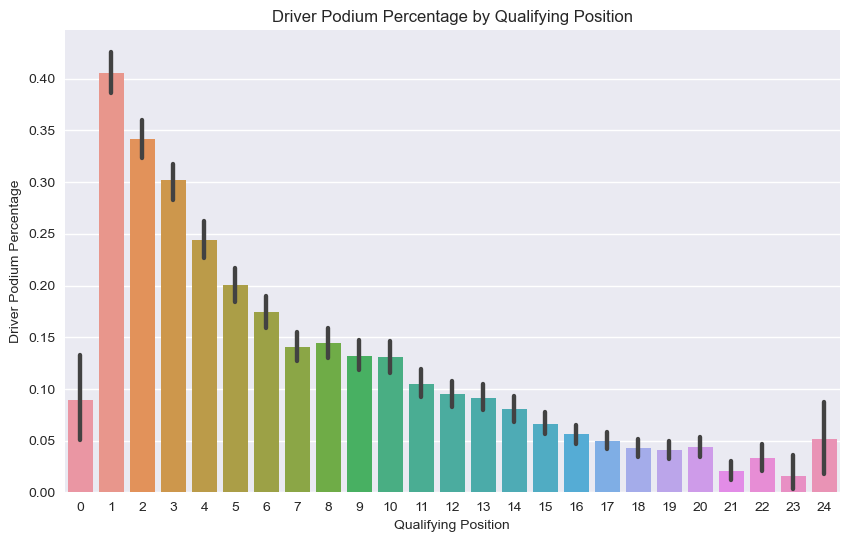

In [92]:
sorted_qual_pos = merged_df['qual_pos'].sort_values().unique()
# filtered_df = merged_df[merged_df['qual_pos'] != 0]
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='qual_pos', y='driver_podium_percent', order=sorted_qual_pos)

# Add labels and title
plt.xlabel('Qualifying Position')
plt.ylabel('Driver Podium Percentage')
plt.title('Driver Podium Percentage by Qualifying Position')

# Display the plot
plt.show()

In [93]:
merged_df['qual_pos'] = merged_df['qual_pos'].astype(str)

In [94]:
merged_df.head()

qual_pos driver_error_dnf constructor_error_dnf  age_at_race  \
1213       16                1                     0         47.0   
1212        9                1                     0         28.0   
9295        9                1                     1         47.0   
9294       15                1                     1         28.0   
9139        6                1                     1         47.0   

               driver                    GP_name  year month  season day  ...  \
1213     Esteban Ocon         Bahrain Grand Prix  2021     3  spring  28  ...   
1212  Fernando Alonso         Bahrain Grand Prix  2021     3  spring  28  ...   
9295     Esteban Ocon  Emilia Romagna Grand Prix  2021     4  spring  18  ...   
9294  Fernando Alonso  Emilia Romagna Grand Prix  2021     4  spring  18  ...   
9139     Esteban Ocon      Portuguese Grand Prix  2021     5  spring   2  ...   

     GP_country altitude  podium driver_home  constructor_home  prev_laptime  \
1213        Bah      7.0       0           0                 0     5889714.0   
1212        Bah      7.0       0           0                 0     6008266.0   
9295        Ita     37.0       0           0                 0     5539995.0   
9294        Ita     37.0       0           0                 0     3321634.0   
9139        Por    108.0       0           0                 0     7420302.0   

      driver_finish_percent  constructor_finish_percent  \
1213               1.000000                    0.000000   
1212               0.954098                    0.000000   
9295               1.000000                    0.000000   
9294               0.954248                    0.333333   
9139               1.000000                    0.500000   

      driver_podium_percent  constructor_podium_percent  
1213               0.015873                         0.0  
1212               0.318033                         0.0  
9295               0.015625                         0.0  
9294               0.316993                         0.0  
9139               0.015385                         0.0  

[5 rows x 21 columns]

#### Percentage of driver winning the race at their home country

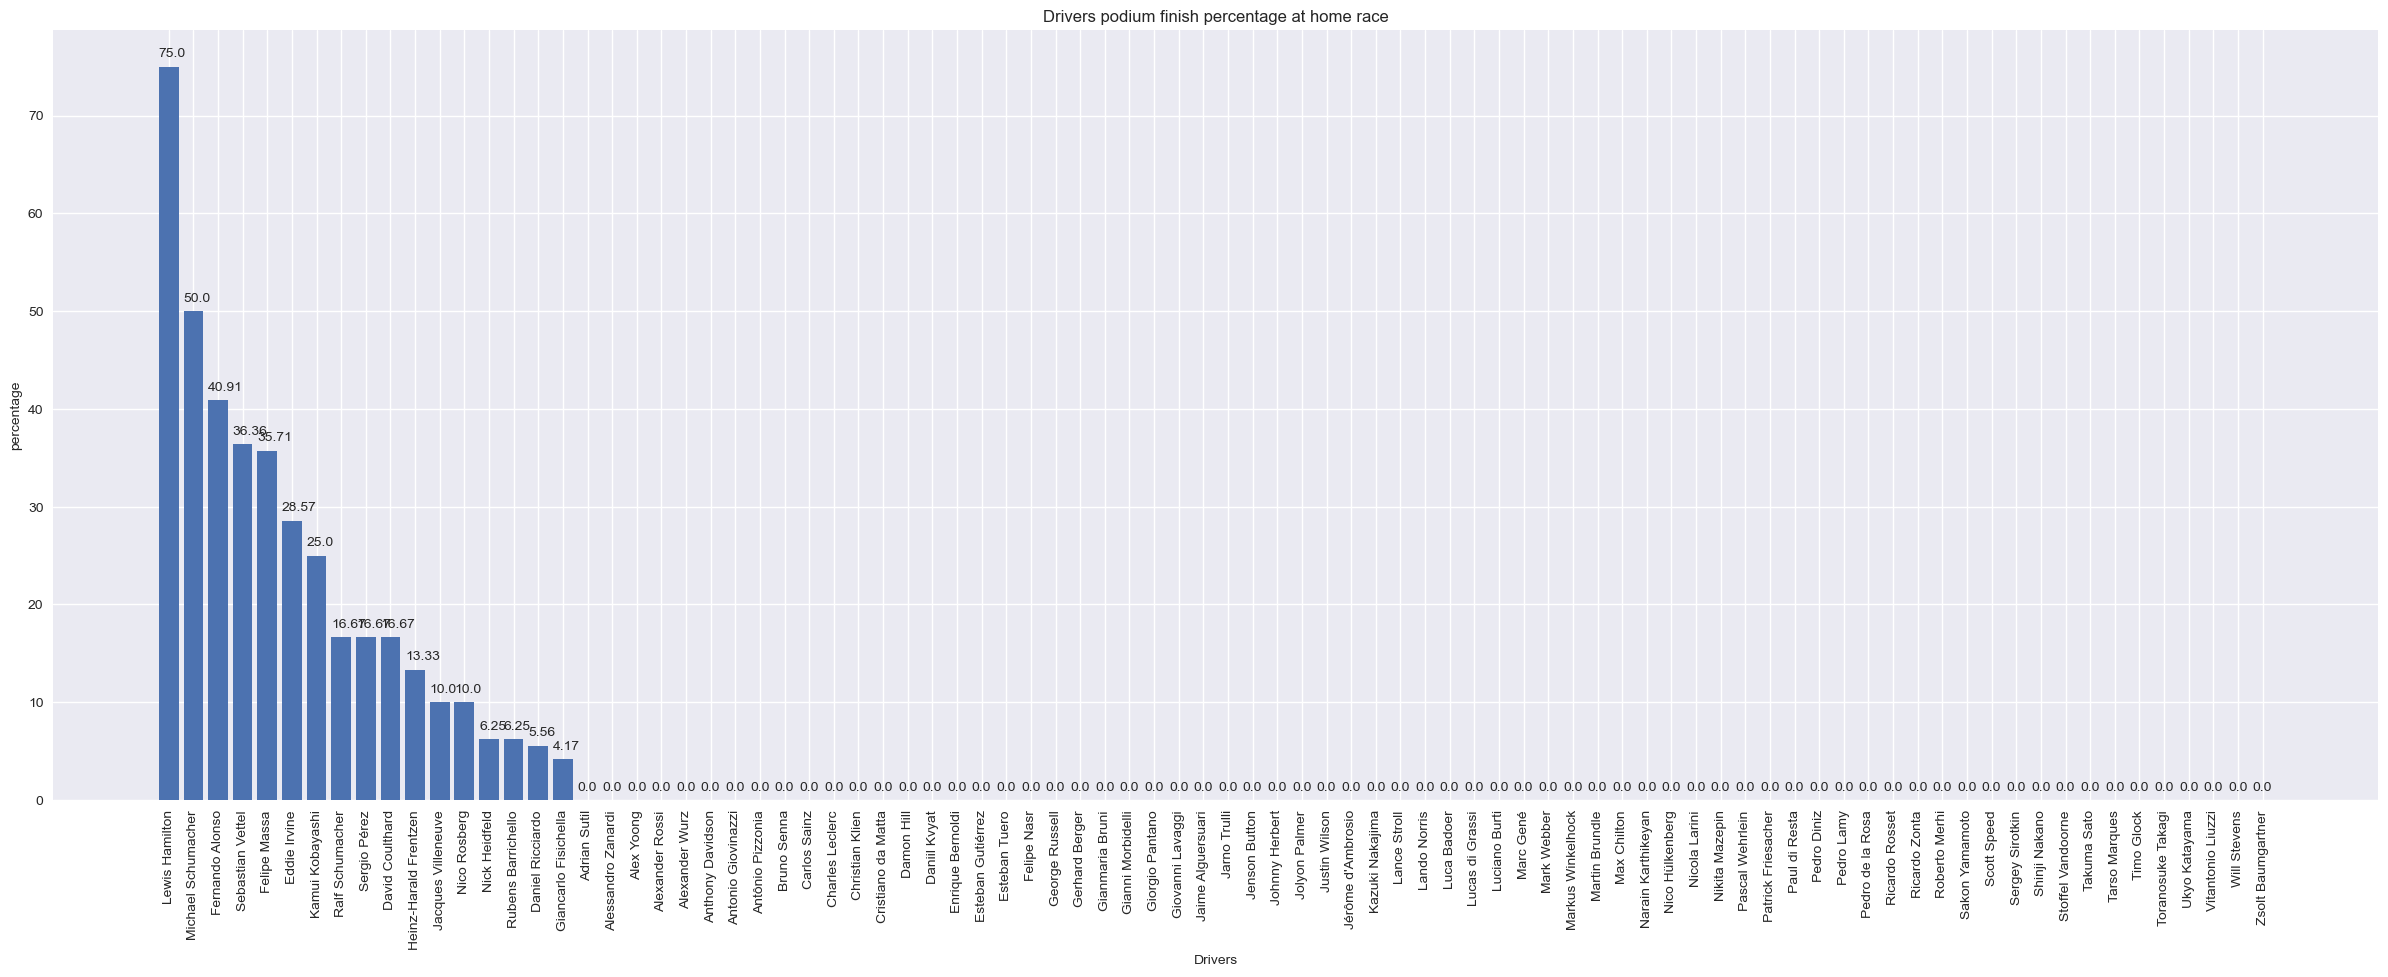

In [95]:
driver_home_podium_finish = merged_df.loc[(merged_df['podium']=='1')&(merged_df['driver_home']==1)].groupby('driver').count()['podium']
total_home_races = merged_df[merged_df['driver_home']==1].groupby('driver').sum()['driver_home']
driver_home_podium_finish_ratio = (driver_home_podium_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_home_podium_finish_ratio.index,height=driver_home_podium_finish_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('percentage')
plt.title('Drivers podium finish percentage at home race')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x(),yval+1,f'{round(yval,2)}')
plt.show()

In [96]:
merged_df['driver_home'] = merged_df['driver_home'].astype(str)

#### Percentage of constructor winning the race at their home country

In [97]:
# constructor_home_podium_finish = merged_df.loc[(merged_df['podium']=='1')&(merged_df['constructor_home']==1)].groupby('constructor').count()['podium']
# total_home_races = merged_df[merged_df['constructor_home']==1].groupby('constructor').sum()['constructor_home']
# constructor_home_podium_finish_ratio = (constructor_home_podium_finish*100/total_home_races).sort_values(ascending=False).fillna(0)
# plt.figure(figsize=(30,10))
# bars = plt.bar(x=constructor_home_podium_finish_ratio.index,height=constructor_home_podium_finish_ratio,align='center',width=0.8)
# plt.xticks(rotation=90)
# plt.xlabel('F1 Teams')
# plt.ylabel('percentage')
# plt.title('F1 Teams podium finish percentage at home race')
# for bar in bars.patches:
#     yval = bar.get_height()
#     plt.text(bar.get_x()+0.2,yval+1,f'{round(yval,2)}')
# plt.show()

In [98]:
merged_df['constructor_home'] = merged_df['constructor_home'].astype(str)

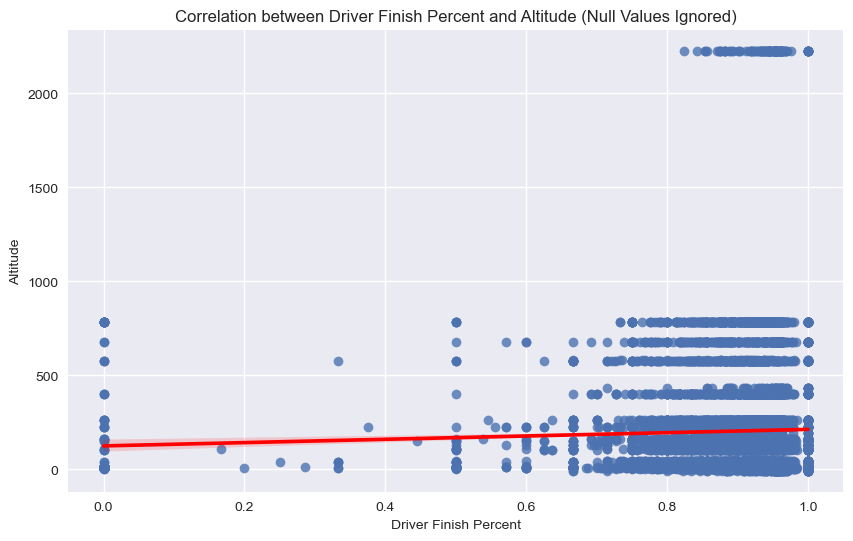

In [99]:
# Filter out rows with null values in 'altitude' column
filtered_df = merged_df.dropna(subset=['altitude'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='driver_finish_percent', y='altitude',line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Driver Finish Percent')
plt.ylabel('Altitude')
plt.title('Correlation between Driver Finish Percent and Altitude (Null Values Ignored)')

# Display the plot
plt.show()

#### Correlation of Numerical Features

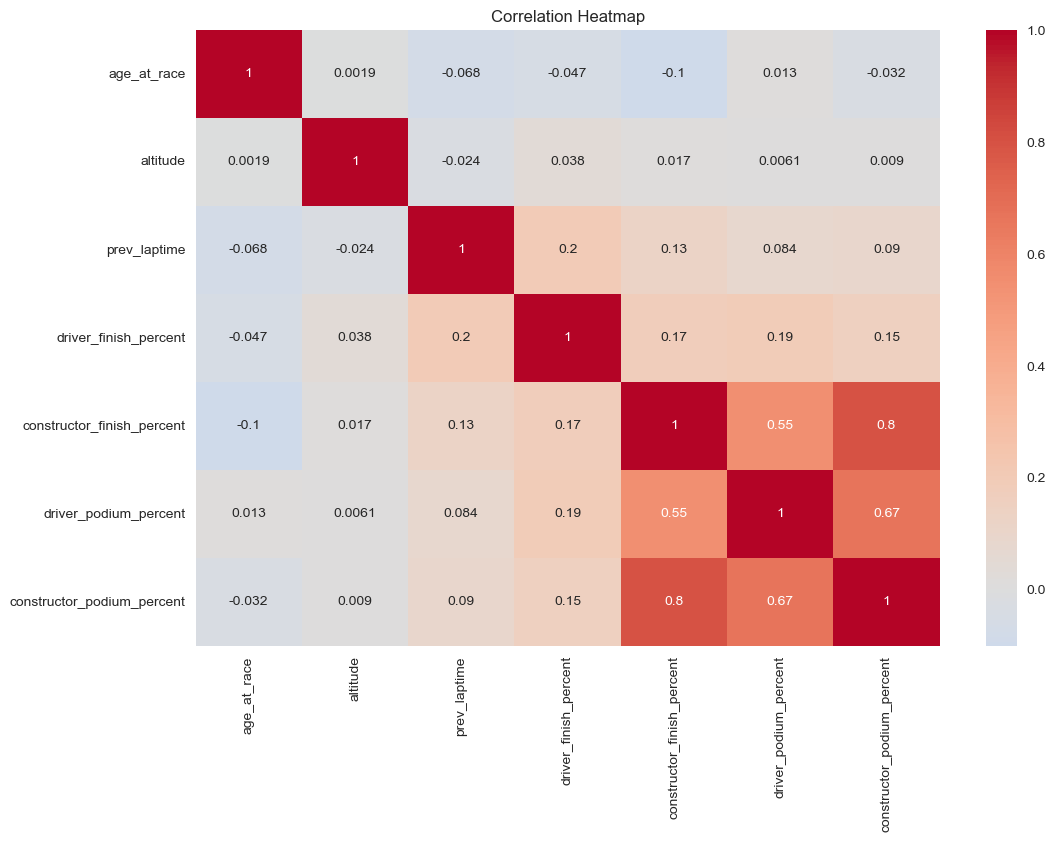

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Step 6: Train-Test Split <a id="part6"></a>

In [101]:
# Split the data into train data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop('podium', axis=1), merged_df['podium'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((6801, 20), (2916, 20))

### Step 7: Data Transformation <a id="part7"></a>

### 7.1: Missing value Imputation With Pipelines <a id="part7.1"></a>

In [102]:
X_train.isnull().mean()

qual_pos                      0.000000
driver_error_dnf              0.000000
constructor_error_dnf         0.000000
age_at_race                   0.000000
driver                        0.000000
GP_name                       0.000000
year                          0.000000
month                         0.000000
season                        0.000000
day                           0.000000
constructor                   0.000000
GP_country                    0.000000
altitude                      0.002059
driver_home                   0.000000
constructor_home              0.000000
prev_laptime                  0.013969
driver_finish_percent         0.000000
constructor_finish_percent    0.000000
driver_podium_percent         0.000000
constructor_podium_percent    0.000000
dtype: float64

In [103]:
features_num_median = ['altitude','prev_laptime']
features_num_mean = ['altitude','prev_laptime']

pipe = Pipeline(steps=[
    ('imp_num_median', MeanMedianImputer(variables=features_num_median, imputation_method='median')),
])

# pipe = Pipeline(steps=[
#     ('imp_num_mean', MeanMedianImputer(variables=features_num_mean, imputation_method='mean')),
# ])

pipe.fit(X_train)

Pipeline(steps=[('imp_num_median',
                 MeanMedianImputer(variables=['altitude', 'prev_laptime']))])

In [104]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [105]:
X_train.isnull().mean()

qual_pos                      0.0
driver_error_dnf              0.0
constructor_error_dnf         0.0
age_at_race                   0.0
driver                        0.0
GP_name                       0.0
year                          0.0
month                         0.0
season                        0.0
day                           0.0
constructor                   0.0
GP_country                    0.0
altitude                      0.0
driver_home                   0.0
constructor_home              0.0
prev_laptime                  0.0
driver_finish_percent         0.0
constructor_finish_percent    0.0
driver_podium_percent         0.0
constructor_podium_percent    0.0
dtype: float64

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6801 entries, 33 to 4049
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   qual_pos                    6801 non-null   object 
 1   driver_error_dnf            6801 non-null   object 
 2   constructor_error_dnf       6801 non-null   object 
 3   age_at_race                 6801 non-null   float64
 4   driver                      6801 non-null   object 
 5   GP_name                     6801 non-null   object 
 6   year                        6801 non-null   object 
 7   month                       6801 non-null   object 
 8   season                      6801 non-null   object 
 9   day                         6801 non-null   object 
 10  constructor                 6801 non-null   object 
 11  GP_country                  6801 non-null   object 
 12  altitude                    6801 non-null   float64
 13  driver_home                 6801

### 7.2: Categorical Encoding <a id="part7.2"></a>

In [107]:
# # Label Encoding
# cat_cols = [c for c in X_train.columns if X_train[c].dtypes == 'O']

# label_enc = LabelEncoder()

# for col in cat_cols:
#     X_train[col] = label_enc.fit_transform(X_train[col])
#     X_test[col] = label_enc.transform(X_test[col])

In [108]:
# # Arbitrary Ordinal encoding
# # cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
# ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',variables=['qual_pos','driver','GP_name','constructor',
#                                                                     'GP_country','year','month','day','season'])
# ordinal_enc.fit(X_train)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)

In [109]:
# # Ordered Ordinal encoding
# # cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
# ordinal_enc = OrdinalEncoder(variables=['year','month','day','season'],encoding_method='ordered')
# ordinal_enc.fit(X_train)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)

In [110]:
# ohe_enc = OneHotEncoder(variables=['driver_error_dnf','constructor_error_dnf','driver_home','constructor_home'])
# ohe_enc.fit(X_train)
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

In [111]:
# OHE Encoding
# variables=['GP_name','year','month','season','day','qual_pos','age_at_race','driver',
#                                    'constructor','GP_country','driver_home','constructor_home']

ohe_enc = OneHotEncoder(top_categories=10)
ohe_enc.fit(X_train)
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [112]:
X_train.head()

age_at_race  altitude  prev_laptime  driver_finish_percent  \
33           38.0      10.0     5789504.0               0.936709   
9084         43.0     255.0     6426471.0               0.942857   
892          30.0       7.0     5575316.0               0.939394   
3868         28.0     103.0     5114348.0               0.961749   
6995         41.0     223.0     4311173.0               0.880342   

      constructor_finish_percent  driver_podium_percent  \
33                      0.696203               0.493671   
9084                    0.659302               0.019048   
892                     0.657627               0.272727   
3868                    0.827648               0.426230   
6995                    0.360169               0.136752   

      constructor_podium_percent  qual_pos_19  qual_pos_1  qual_pos_16  ...  \
33                      0.449367            0           0            0  ...   
9084                    0.269767            0           0            0  ...   
892                     0.376271            0           0            0  ...   
3868                    0.502693            0           1            0  ...   
6995                    0.016949            0           0            0  ...   

      GP_country_Hun  GP_country_Bri  GP_country_Bra  GP_country_Mon  \
33                 0               0               0               0   
9084               0               0               0               0   
892                0               0               0               0   
3868               0               0               0               0   
6995               0               0               0               0   

      GP_country_Can  GP_country_Jap  driver_home_0  driver_home_1  \
33                 0               0              1              0   
9084               0               0              1              0   
892                0               0              1              0   
3868               0               0              1              0   
6995               0               0              1              0   

      constructor_home_0  constructor_home_1  
33                     1                   0  
9084                   1                   0  
892                    1                   0  
3868                   1                   0  
6995                   1                   0  

[5 rows x 99 columns]

### 7.3: Numerical Transformation <a id="part7.3"></a>

In [113]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], label="skew: " + str(np.round(df[variable].skew(),2)), bins=30)
    plt.title('Histogram')
    plt.legend()

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [114]:
num_cols = ['altitude','age_at_race','prev_laptime','driver_finish_percent','driver_podium_percent',
            'constructor_finish_percent','constructor_podium_percent']

#### altitude <a id="part7.3.1"></a>

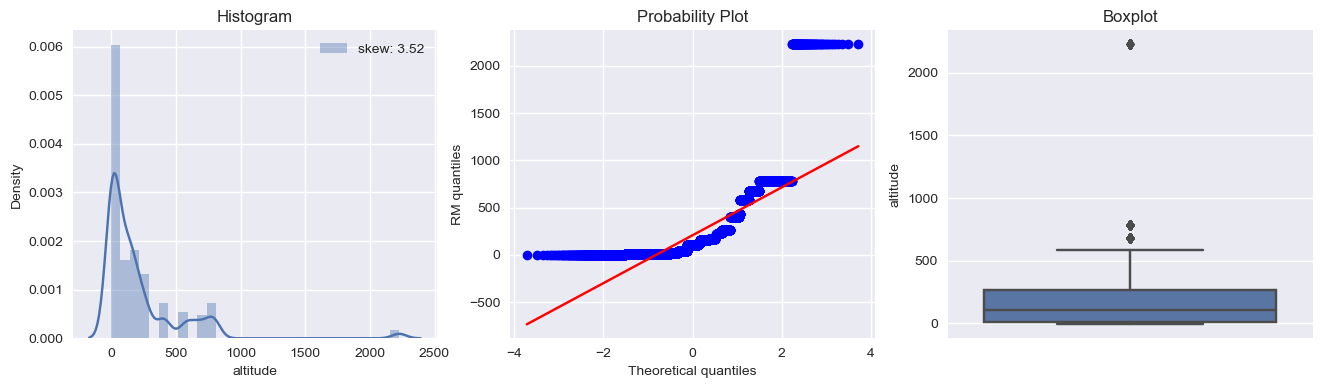

In [115]:
diagnostic_plots(X_train, 'altitude')

#### Transforming

In [116]:
# # Logarithmic Transformation

# lt = LogTransformer(variables=['altitude'])

# # fit transformer to data set
# lt.fit(X_train)



# # transform variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

# # error on altitude Column:: ValueError: Some variables contain zero or negative values, can't apply log

In [117]:
# # Reciprocal Transformation

# rt = ReciprocalTransformer(variables = ['altitude'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)


# # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

# # ValueError for altitude column: Some variables contain the value zero, can't apply reciprocal transformation.

In [118]:
# YeoJohnson Trasnformation

yjt = YeoJohnsonTransformer(variables = ['altitude'])

# fit transformer to the dataframe
yjt.fit(X_train)


# transform indicated variables

X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

# skewness went from 1.12 to -0.74 became left skewed, and the  boxplot became smaller and an outlier was generated on 
# the min side

In [119]:
# # BoxCox Transformation

# bct = BoxCoxTransformer(variables = ['altitude'])

# # fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

# # ValueError on alt column: Data must be positive.

In [120]:
# # Power Transformation

# et = PowerTransformer(variables = ['altitude'], exp=3/4)

# # fit transformer to data
# et.fit(X_train)

# # transform indicated variables in the dataset
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

#### Result

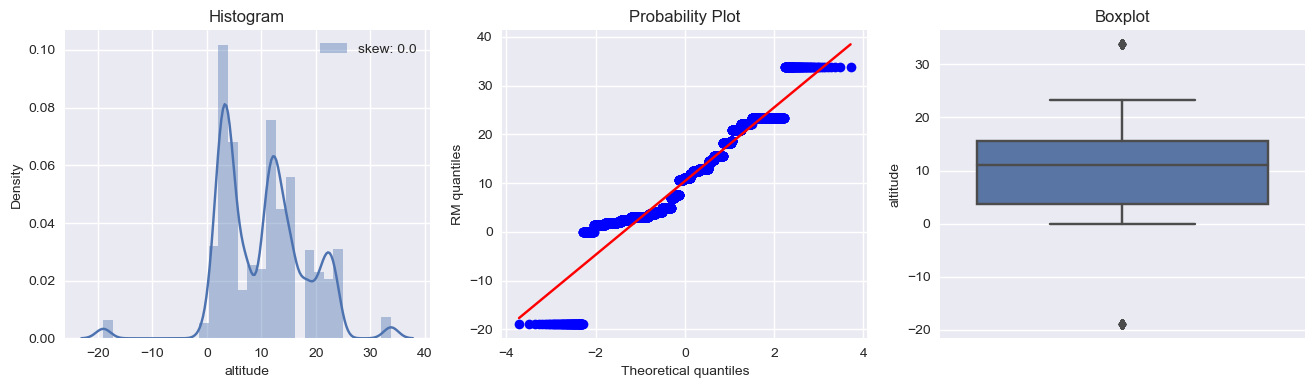

In [121]:
diagnostic_plots(X_train, 'altitude')

In [122]:
X_train['driver_finish_percent'].unique()

array([0.93670886, 0.94285714, 0.93939394, ..., 0.9408284 , 0.83928571,
       0.9408867 ])

### driver_finish_percent

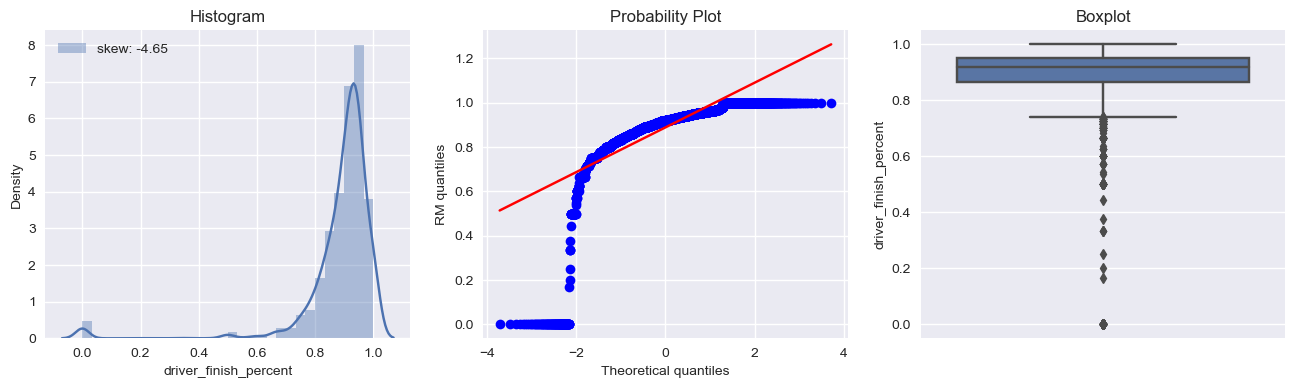

In [123]:
diagnostic_plots(X_train, 'driver_finish_percent')

#### Transforming

In [124]:
# # Logarithmic Transformation

# lt = LogTransformer(variables=['driver_finish_percent'])

# # fit transformer to data set
# lt.fit(X_train)



# # transform variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

# # error on driver_finish_percent Column:: ValueError: Some variables contain zero or negative values, can't apply log

In [125]:
# # # Reciprocal Transformation

# rt = ReciprocalTransformer(variables = ['driver_finish_percent'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)


# # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

# # ValueError for driver_finish_percent column: Some variables contain the value zero, can't apply reciprocal transformation.

In [126]:
# # YeoJohnson Trasnformation

# yjt = YeoJohnsonTransformer(variables = ['driver_finish_percent'])

# # fit transformer to the dataframe
# yjt.fit(X_train)



# # transform indicated variables

# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [127]:
# # # BoxCox Transformation

# bct = BoxCoxTransformer(variables = ['driver_finish_percent'])

# # fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

# # ValueError: Data must be positive.

In [128]:
# # Power Transformation

# et = PowerTransformer(variables = ['driver_finish_percent'], exp=3/4)

# # fit transformer to data
# et.fit(X_train)

# # transform indicated variables in the dataset
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

#### Result

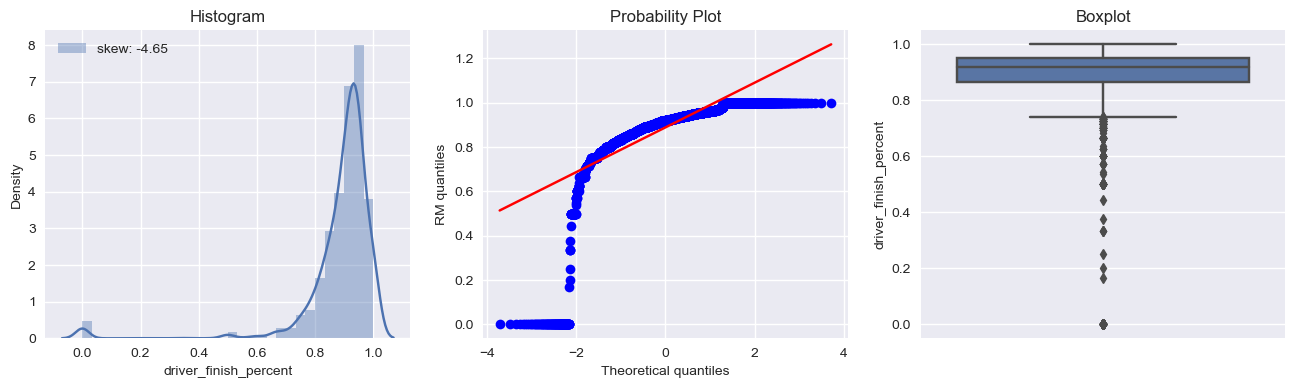

In [129]:
diagnostic_plots(X_train, 'driver_finish_percent')

### driver_podium_percent

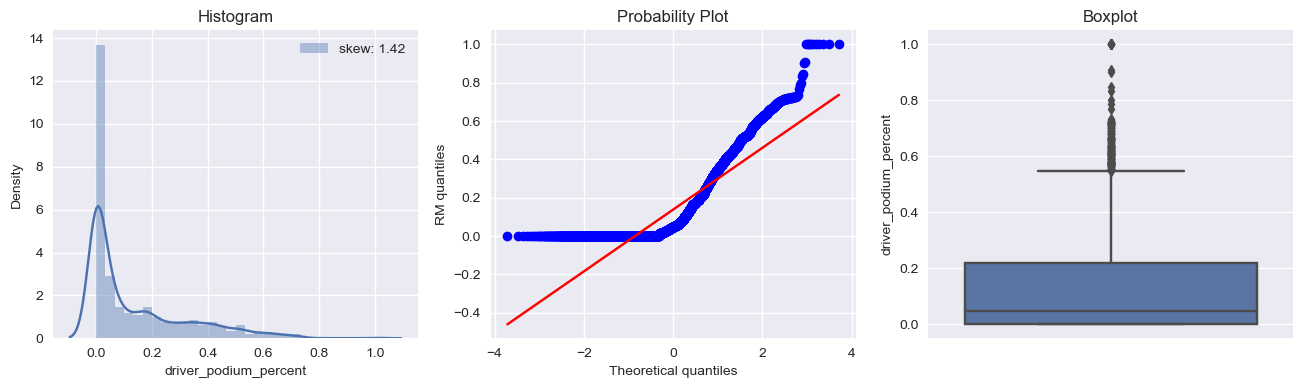

In [130]:
diagnostic_plots(X_train, 'driver_podium_percent')

#### Transforming

In [131]:
# # Logarithmic Transformation

# lt = LogTransformer(variables=['driver_podium_percent'])

# # fit transformer to data set
# lt.fit(X_train)


# # transform variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

In [132]:
# # Reciprocal Transformation

# rt = ReciprocalTransformer(variables = ['driver_podium_percent'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)


# # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

In [133]:
# # YeoJohnson Trasnformation

# yjt = YeoJohnsonTransformer(variables = ['driver_podium_percent'])

# # fit transformer to the dataframe
# yjt.fit(X_train)


# # transform indicated variables

# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [134]:
# # # BoxCox Transformation

# bct = BoxCoxTransformer(variables = ['driver_podium_percent'])

# # fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

In [135]:
# # Power Transformation

# et = PowerTransformer(variables = ['driver_podium_percent'], exp=3/4)

# # fit transformer to data
# et.fit(X_train)

# # transform indicated variables in the dataset
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

#### Result

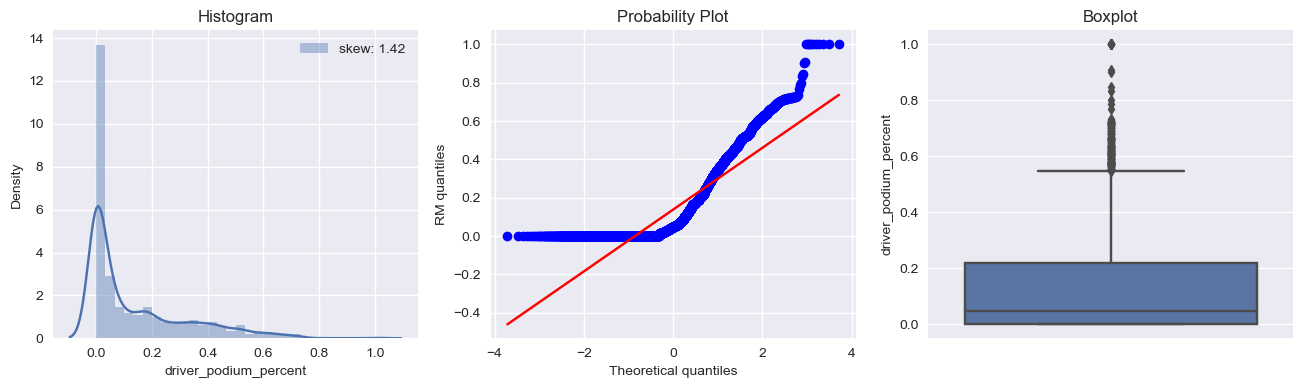

In [136]:
diagnostic_plots(X_train, 'driver_podium_percent')

### constructor_finish_percent

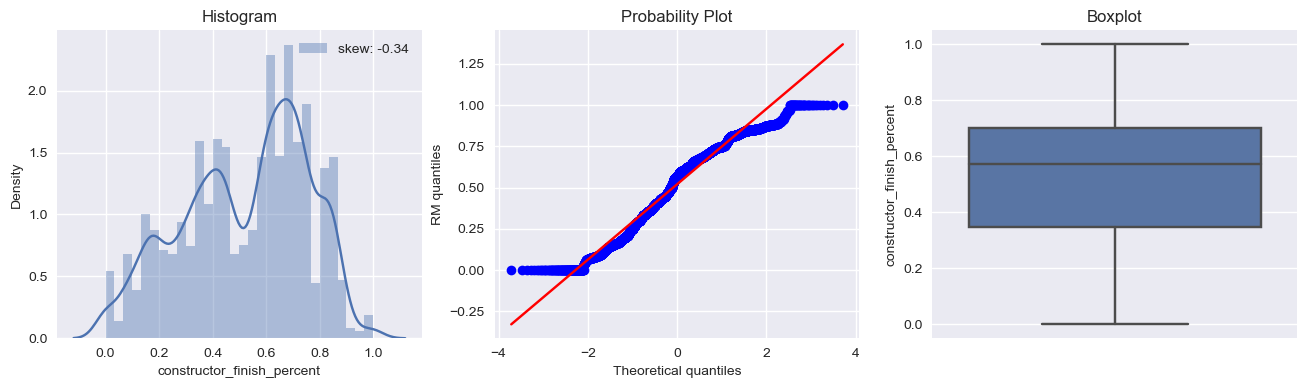

In [137]:
diagnostic_plots(X_train, 'constructor_finish_percent')

#### Transforming

In [138]:
# # Logarithmic Transformation

# lt = LogTransformer(variables=['constructor_finish_percent'])

# # fit transformer to data set
# lt.fit(X_train)

# # transform variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

In [139]:
# # Reciprocal Transformation

# rt = ReciprocalTransformer(variables = ['constructor_finish_percent'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)

# # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

In [140]:
# # YeoJohnson Trasnformation

# yjt = YeoJohnsonTransformer(variables = ['constructor_finish_percent'])

# # fit transformer to the dataframe
# yjt.fit(X_train)


# # transform indicated variables

# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [141]:
# # # BoxCox Transformation

# bct = BoxCoxTransformer(variables = ['constructor_finish_percent'])

# # fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

In [142]:
# # Power Transformation

# et = PowerTransformer(variables = ['constructor_finish_percent'], exp=3/4)

# # fit transformer to data
# et.fit(X_train)

# # transform indicated variables in the dataset
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

#### Result

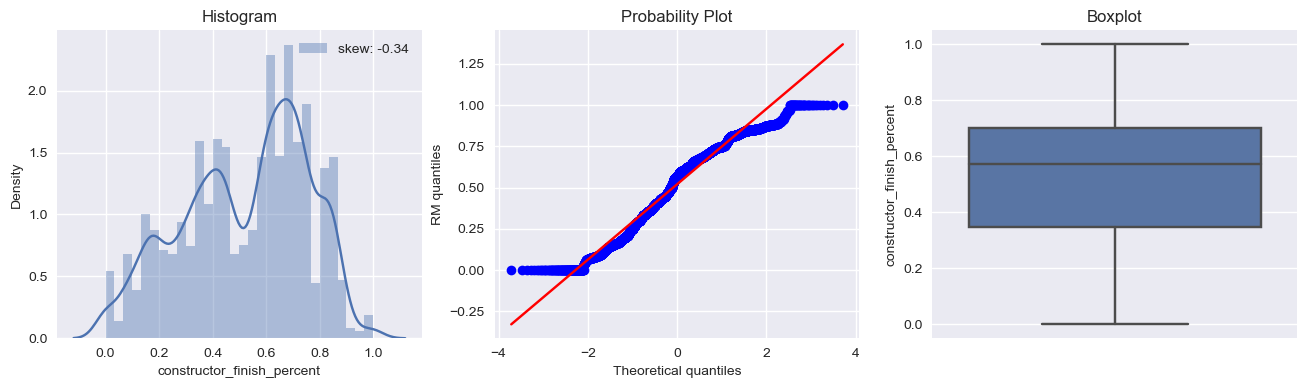

In [143]:
diagnostic_plots(X_train, 'constructor_finish_percent')

### constructor_podium_percent

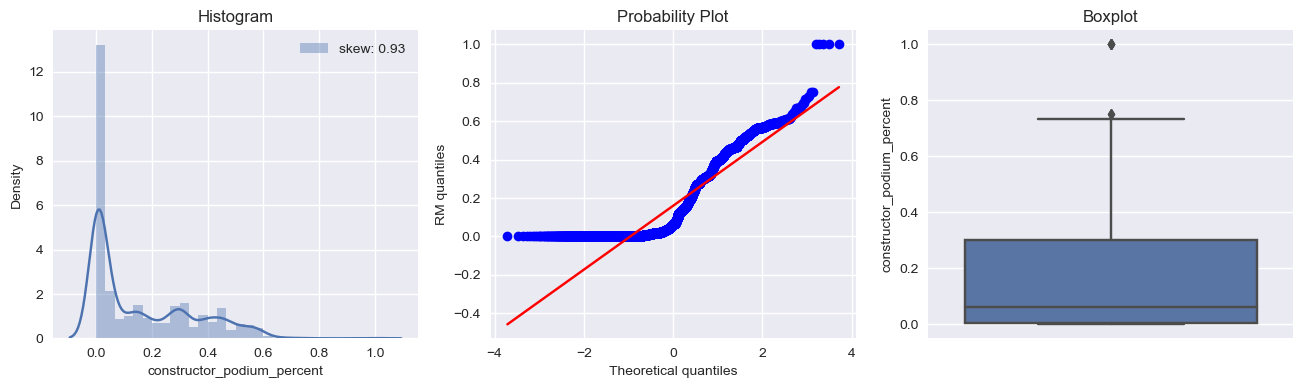

In [144]:
diagnostic_plots(X_train, 'constructor_podium_percent')

#### Transforming

In [145]:
# # Logarithmic Transformation

# lt = LogTransformer(variables=['constructor_podium_percent'])

# # fit transformer to data set
# lt.fit(X_train)


# # transform variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

In [146]:
# # Reciprocal Transformation

# rt = ReciprocalTransformer(variables = ['constructor_podium_percent'])

# # fit transformer to the entire dataframe
# rt.fit(X_train)

# # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

In [147]:
# # YeoJohnson Trasnformation

# yjt = YeoJohnsonTransformer(variables = ['constructor_podium_percent'])

# # fit transformer to the dataframe
# yjt.fit(X_train)

# # transform indicated variables

# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

In [148]:
# # # BoxCox Transformation

# bct = BoxCoxTransformer(variables = ['constructor_podium_percent'])

# # fit transformer to the data set
# bct.fit(X_train)

# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

In [149]:
# # Power Transformation

# et = PowerTransformer(variables = ['constructor_podium_percent'], exp=3/4)

# # fit transformer to data
# et.fit(X_train)

# # transform indicated variables in the dataset
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

### 7.4: Dealing with Outliers <a id="part7.4"></a>

#### Identifying Outliers

Feature: altitude


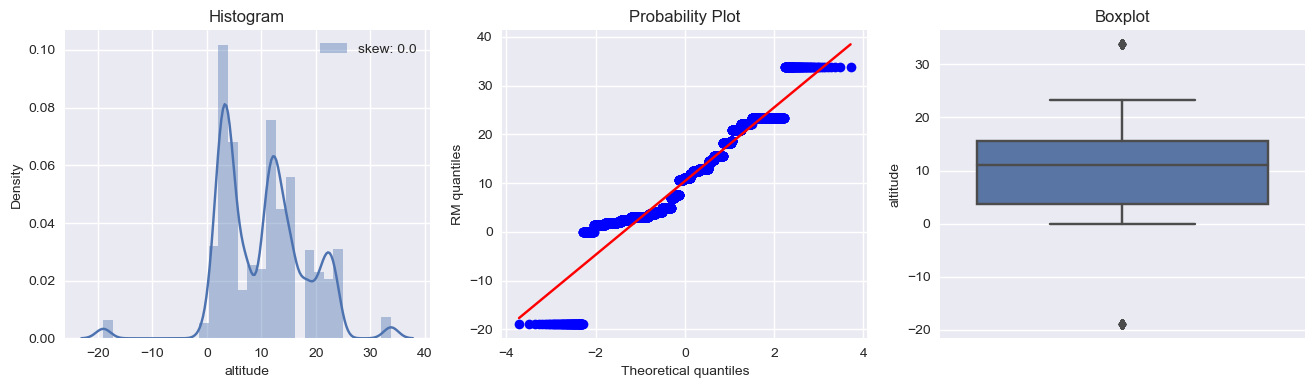

Feature: age_at_race


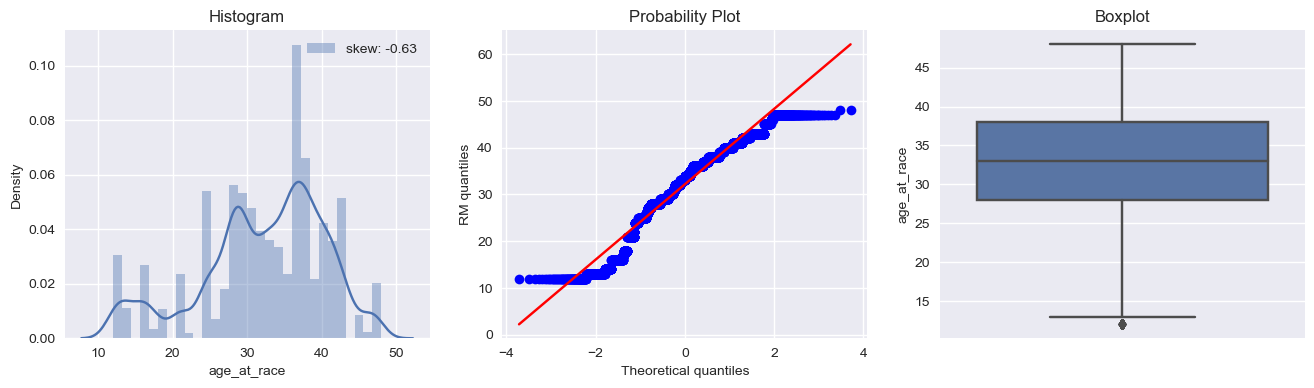

Feature: prev_laptime


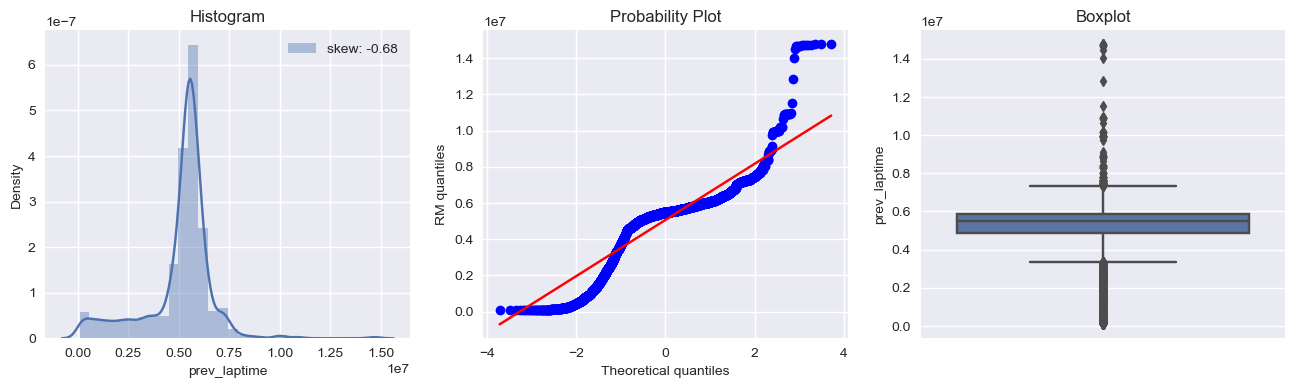

Feature: driver_finish_percent


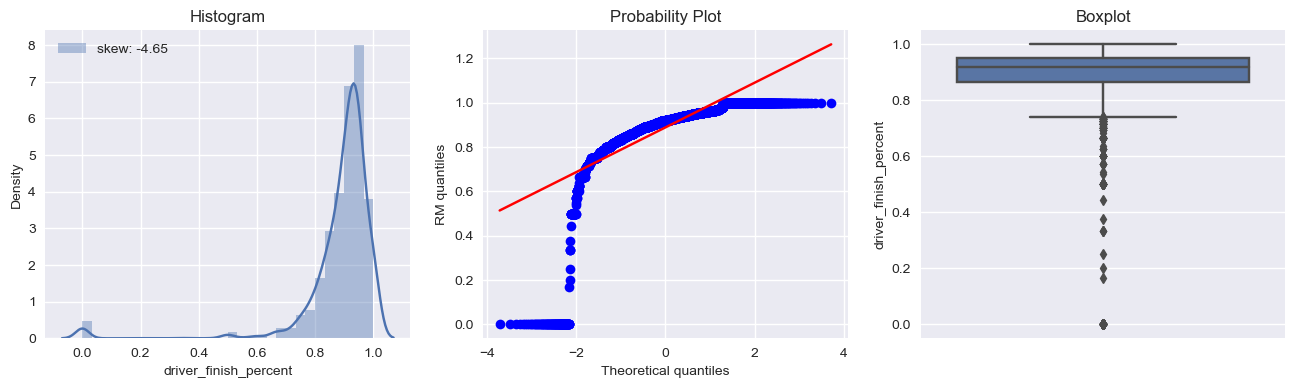

Feature: driver_podium_percent


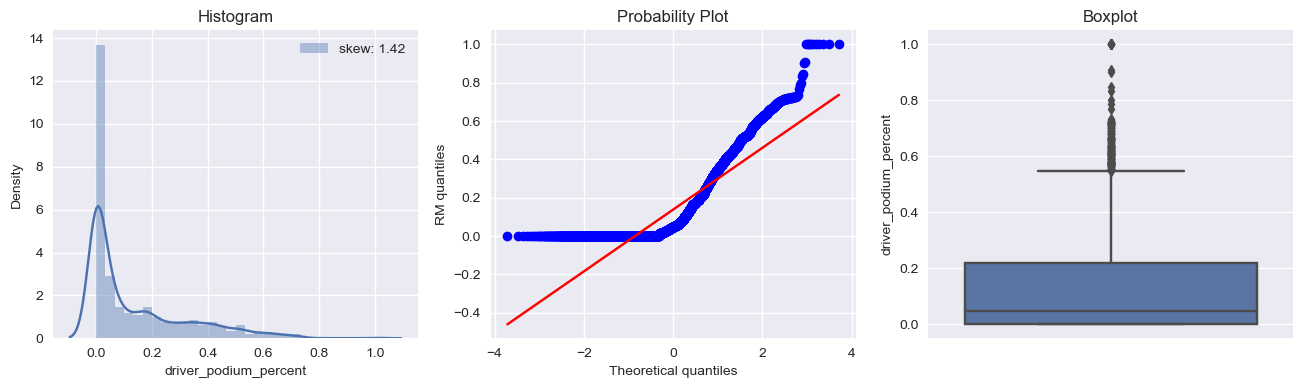

Feature: constructor_finish_percent


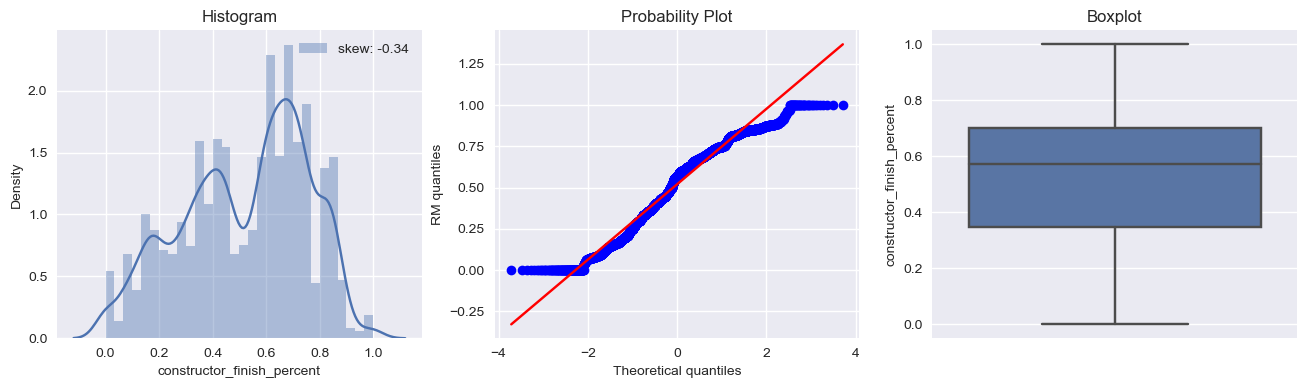

Feature: constructor_podium_percent


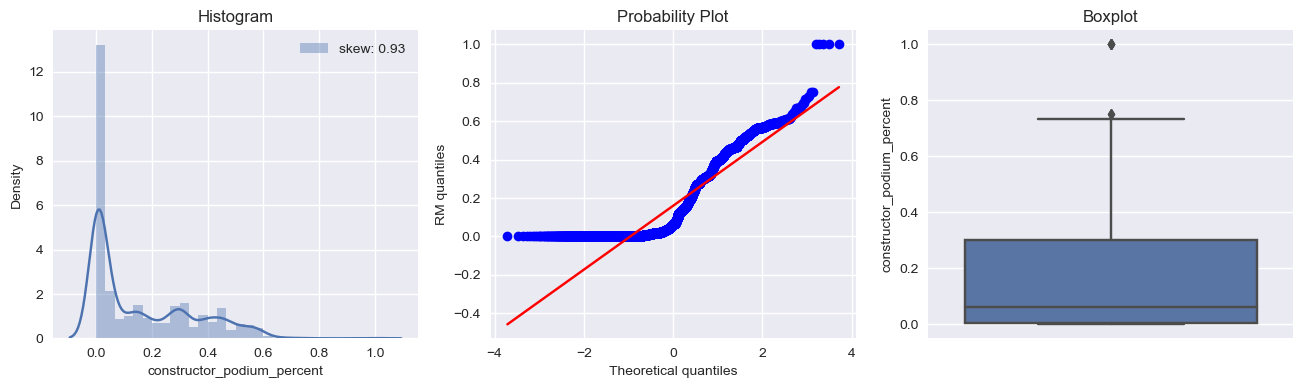

In [150]:
for x in num_cols:
    print(f"Feature: {x}")
    diagnostic_plots(X_train, x)

#### altitude <a id="part7.4.1"></a>

#### Winsorization

In [151]:
# windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
#                           tail='both', # cap left, right or both tails 
#                           fold=3,
#                           variables=num_cols)

# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)

In [152]:
# windsorizer.left_tail_caps_

In [153]:
# windsorizer.right_tail_caps_

#### Capping

In [154]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [155]:
upper_limit, lower_limit = find_skewed_boundaries(X_train, 'altitude', 1.5)
upper_limit, lower_limit
    
X_train['altitude']= np.where(X_train['altitude'] > upper_limit, upper_limit,
                       np.where(X_train['altitude'] < lower_limit, lower_limit, X_train['altitude']))

X_test['altitude']= np.where(X_test['altitude'] > upper_limit, upper_limit,
                       np.where(X_test['altitude'] < lower_limit, lower_limit, X_test['altitude']))

#### Results

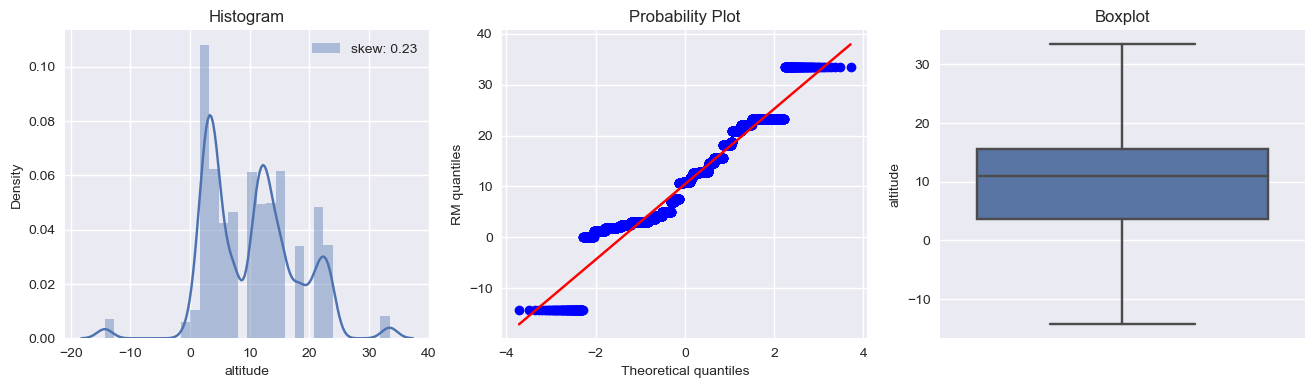

In [156]:
diagnostic_plots(X_train, 'altitude')

### 7.5: Binning <a id="part7.5"></a>

#### Numerical features Binning

In [157]:
# # Equal Width Discretization
# bin_numcol = ['racelaptime_milli','fastestlap_milli','driver_finish_percent','constructor_finish_percent',
#            'driver_win_percent','constructor_win_percent']

# bin_numcol = ['altitude','driver_finish_percent','constructor_finish_percent',
#               'driver_podium_percent','constructor_podium_percent','age_at_race']

# for x in bin_numcol:
    
#     disc = EqualWidthDiscretiser(bins=10,variables = [x])
#     disc.fit(X_train)

#     train_t = disc.transform(X_train)
#     test_t = disc.transform(X_test)

#     t1 = train_t.groupby([x])[x].count() / len(train_t)
#     t2 = test_t.groupby([x])[x].count() / len(test_t)

#     f1_tmp = pd.concat([t1,t2], axis=1)
#     f1_tmp.columns = ['train','test']
#     f1_tmp.plot.bar()
#     plt.xticks(rotation=0)
    
# plt.ylabel('No.of observations per bin')

Text(0, 0.5, 'No.of observations per bin')

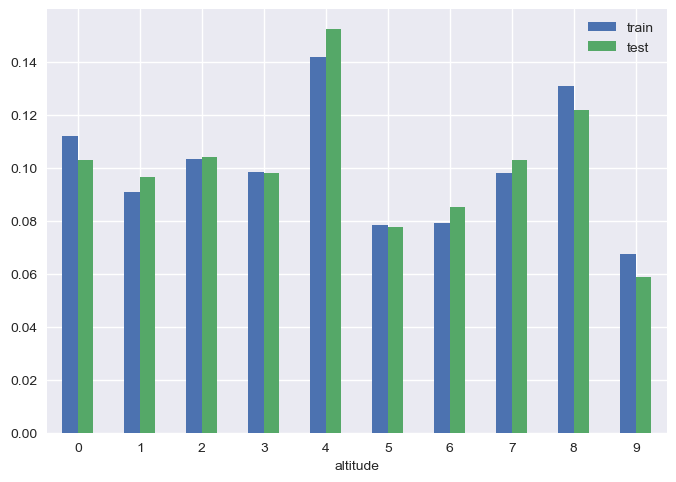

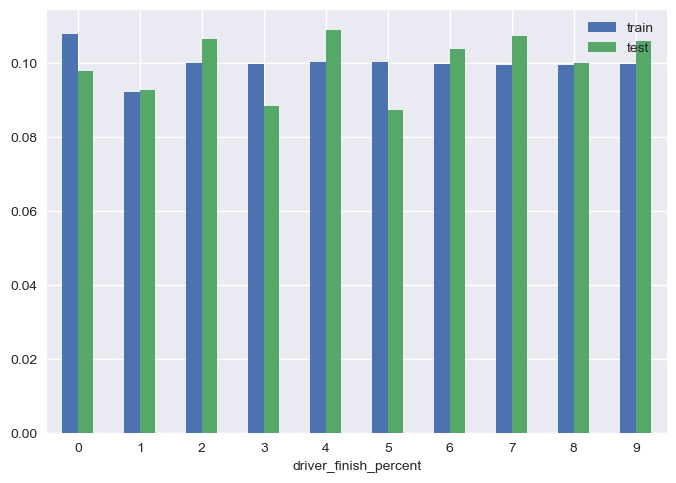

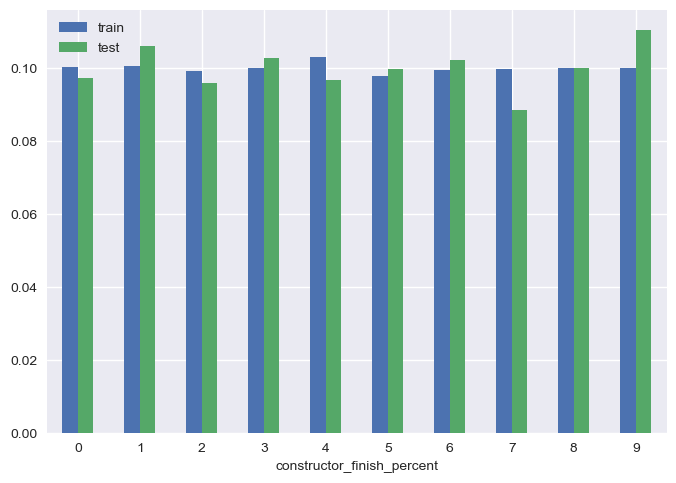

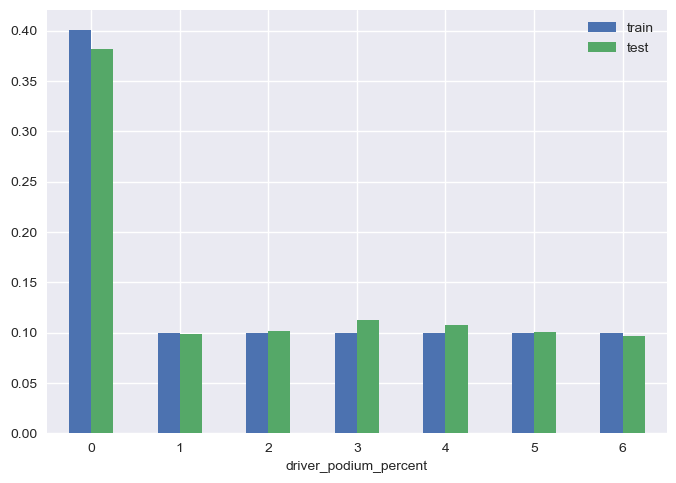

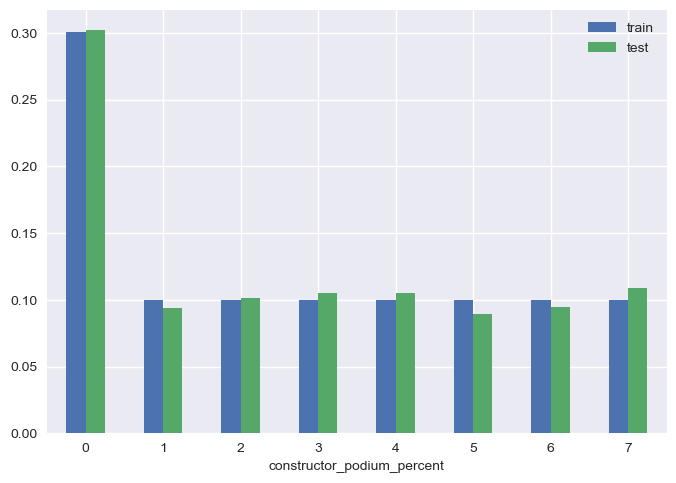

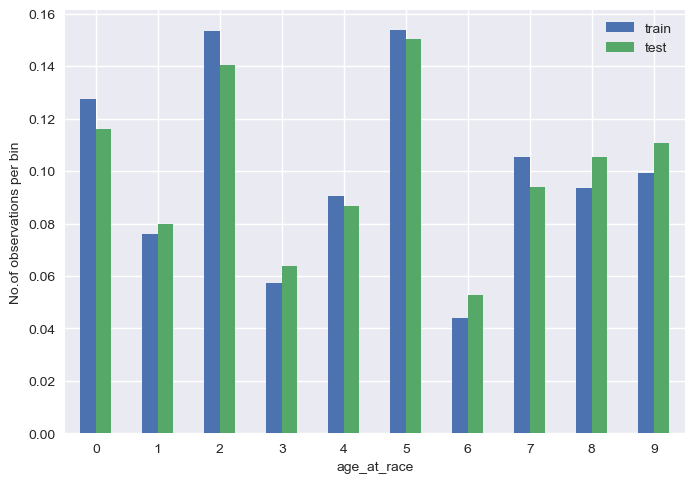

In [158]:
# Equal Frequency Discretization
# bin_numcol = ['racelaptime_milli','fastestlap_milli','driver_finish_percent','constructor_finish_percent',
#            'driver_win_percent','constructor_win_percent']

bin_numcol = ['altitude','driver_finish_percent','constructor_finish_percent',
              'driver_podium_percent','constructor_podium_percent','age_at_race']

for x in bin_numcol:
    
    disc = EqualFrequencyDiscretiser(variables = [x])
    disc.fit(X_train)

    train_t = disc.transform(X_train)
    test_t = disc.transform(X_test)

    t1 = train_t.groupby([x])[x].count() / len(train_t)
    t2 = test_t.groupby([x])[x].count() / len(test_t)

    f1_tmp = pd.concat([t1,t2], axis=1)
    f1_tmp.columns = ['train','test']
    f1_tmp.plot.bar()
    plt.xticks(rotation=0)
    
plt.ylabel('No.of observations per bin')

### Step 8: Feature engineering <a id="part8"></a>

#### 8.1: Scaling <a id="part8.1"></a>

In [159]:
# Standardisation
# set up the scaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.mean_

scaler.scale_

array([8.24684786e+00, 7.62955555e+00, 1.69636666e+06, 1.35964433e-01,
       2.32138035e-01, 1.82906776e-01, 1.83226550e-01, 2.16098568e-01,
       2.16098568e-01, 2.16098568e-01, 2.15483908e-01, 2.14867086e-01,
       2.14248086e-01, 2.13003470e-01, 2.12690924e-01, 2.11749905e-01,
       2.11435097e-01, 2.75774845e-01, 2.75774845e-01, 4.99579093e-01,
       4.99579093e-01, 1.81518481e-01, 1.80001641e-01, 1.75752699e-01,
       1.69762583e-01, 1.65632560e-01, 1.63097995e-01, 1.62243275e-01,
       1.56560444e-01, 1.54312722e-01, 1.51103743e-01, 2.31376479e-01,
       2.27101324e-01, 2.25653484e-01, 2.23900532e-01, 2.23900532e-01,
       2.23606699e-01, 2.19441384e-01, 2.17929767e-01, 2.13626887e-01,
       2.11119717e-01, 2.20042435e-01, 2.11119717e-01, 2.08255136e-01,
       2.07289601e-01, 2.06966546e-01, 2.01712746e-01, 1.99699796e-01,
       1.98003703e-01, 1.98003703e-01, 1.92103976e-01, 3.51336460e-01,
       3.40124855e-01, 3.26822983e-01, 3.20415956e-01, 3.19710069e-01,
      

In [160]:
# # Mean Normalisation
# means = X_train.mean(axis=0)
# ranges = X_train.max(axis=0)-X_train.min(axis=0)

# X_train_scaled = (X_train - means)/ranges
# X_test_scaled = (X_test - means)/ranges

In [161]:
# ## MinMax Scaling
# scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.data_max_

# scaler.min_

# scaler.data_range_

In [162]:
# # Max Absolute Scaling
# scaler = MaxAbsScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.max_abs_

In [163]:
# # Robust Scaling
# scaler = RobustScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.center_

# scaler.scale_

In [164]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

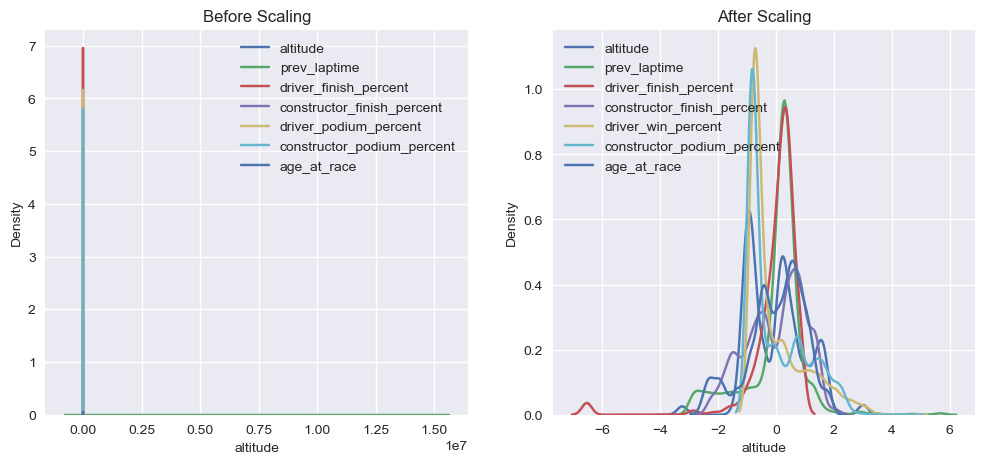

In [165]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['altitude'], ax=ax1, label ='altitude')
sns.kdeplot(X_train['prev_laptime'], ax=ax1, label ='prev_laptime')
# sns.kdeplot(X_train['fastestlap_milli'], ax=ax1, label ='fastestlap_milli')
sns.kdeplot(X_train['driver_finish_percent'], ax=ax1, label ='driver_finish_percent')
sns.kdeplot(X_train['constructor_finish_percent'], ax=ax1, label ='constructor_finish_percent')
sns.kdeplot(X_train['driver_podium_percent'], ax=ax1, label ='driver_podium_percent')
sns.kdeplot(X_train['constructor_podium_percent'], ax=ax1, label ='constructor_podium_percent')
sns.kdeplot(X_train['age_at_race'], ax=ax1, label ='age_at_race')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['altitude'], ax=ax2, label ='altitude')
sns.kdeplot(X_train_scaled['prev_laptime'], ax=ax2, label ='prev_laptime')
# sns.kdeplot(X_train_scaled['fastestlap_milli'], ax=ax2, label ='fastestlap_milli')
sns.kdeplot(X_train_scaled['driver_finish_percent'], ax=ax2, label ='driver_finish_percent')
sns.kdeplot(X_train_scaled['constructor_finish_percent'], ax=ax2, label ='constructor_finish_percent')
sns.kdeplot(X_train_scaled['driver_podium_percent'], ax=ax2, label ='driver_win_percent')
sns.kdeplot(X_train_scaled['constructor_podium_percent'], ax=ax2, label ='constructor_podium_percent')
sns.kdeplot(X_train_scaled['age_at_race'], ax=ax2, label ='age_at_race')
ax2.legend()
plt.show()

In [166]:
X_train=X_train_scaled
X_test=X_test_scaled

#### 8.2: Polynomial Expansion <a id="part8.2"></a>

In [167]:
X_train.head()

age_at_race  altitude  prev_laptime  driver_finish_percent  \
0     0.706726 -0.893404      0.427514               0.353147   
1     1.313018  0.642478      0.803003               0.398367   
2    -0.263342 -0.978963      0.301252               0.372895   
3    -0.505859  0.036286      0.029513               0.537311   
4     1.070501  0.541208     -0.443955              -0.061425   

   constructor_finish_percent  driver_podium_percent  \
0                    0.760203               1.943325   
1                    0.601245              -0.651566   
2                    0.594029               0.735368   
3                    1.326442               1.574605   
4                   -0.687354              -0.008044   

   constructor_podium_percent  qual_pos_19  qual_pos_1  qual_pos_16  ...  \
0                    1.583197    -0.227259   -0.227259    -0.227259  ...   
1                    0.602992    -0.227259   -0.227259    -0.227259  ...   
2                    1.184260    -0.227259   -0.227259    -0.227259  ...   
3                    1.874235    -0.227259    4.400259    -0.227259  ...   
4                   -0.776821    -0.227259   -0.227259    -0.227259  ...   

   GP_country_Hun  GP_country_Bri  GP_country_Bra  GP_country_Mon  \
0       -0.245299       -0.244287       -0.240205       -0.236415   
1       -0.245299       -0.244287       -0.240205       -0.236415   
2       -0.245299       -0.244287       -0.240205       -0.236415   
3       -0.245299       -0.244287       -0.240205       -0.236415   
4       -0.245299       -0.244287       -0.240205       -0.236415   

   GP_country_Can  GP_country_Jap  driver_home_0  driver_home_1  \
0       -0.231168       -0.229398       0.225465      -0.225465   
1       -0.231168       -0.229398       0.225465      -0.225465   
2       -0.231168       -0.229398       0.225465      -0.225465   
3       -0.231168       -0.229398       0.225465      -0.225465   
4       -0.231168       -0.229398       0.225465      -0.225465   

   constructor_home_0  constructor_home_1  
0            0.012127           -0.012127  
1            0.012127           -0.012127  
2            0.012127           -0.012127  
3            0.012127           -0.012127  
4            0.012127           -0.012127  

[5 rows x 99 columns]

In [168]:
X_train.shape

(6801, 99)

In [169]:
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# poly.fit(X_train)

# X_train_poly = poly.transform(X_train)
# X_test_poly = poly.transform(X_test)

# X_train = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
# X_test = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test.columns))

In [170]:
X_train.head()

age_at_race  altitude  prev_laptime  driver_finish_percent  \
0     0.706726 -0.893404      0.427514               0.353147   
1     1.313018  0.642478      0.803003               0.398367   
2    -0.263342 -0.978963      0.301252               0.372895   
3    -0.505859  0.036286      0.029513               0.537311   
4     1.070501  0.541208     -0.443955              -0.061425   

   constructor_finish_percent  driver_podium_percent  \
0                    0.760203               1.943325   
1                    0.601245              -0.651566   
2                    0.594029               0.735368   
3                    1.326442               1.574605   
4                   -0.687354              -0.008044   

   constructor_podium_percent  qual_pos_19  qual_pos_1  qual_pos_16  ...  \
0                    1.583197    -0.227259   -0.227259    -0.227259  ...   
1                    0.602992    -0.227259   -0.227259    -0.227259  ...   
2                    1.184260    -0.227259   -0.227259    -0.227259  ...   
3                    1.874235    -0.227259    4.400259    -0.227259  ...   
4                   -0.776821    -0.227259   -0.227259    -0.227259  ...   

   GP_country_Hun  GP_country_Bri  GP_country_Bra  GP_country_Mon  \
0       -0.245299       -0.244287       -0.240205       -0.236415   
1       -0.245299       -0.244287       -0.240205       -0.236415   
2       -0.245299       -0.244287       -0.240205       -0.236415   
3       -0.245299       -0.244287       -0.240205       -0.236415   
4       -0.245299       -0.244287       -0.240205       -0.236415   

   GP_country_Can  GP_country_Jap  driver_home_0  driver_home_1  \
0       -0.231168       -0.229398       0.225465      -0.225465   
1       -0.231168       -0.229398       0.225465      -0.225465   
2       -0.231168       -0.229398       0.225465      -0.225465   
3       -0.231168       -0.229398       0.225465      -0.225465   
4       -0.231168       -0.229398       0.225465      -0.225465   

   constructor_home_0  constructor_home_1  
0            0.012127           -0.012127  
1            0.012127           -0.012127  
2            0.012127           -0.012127  
3            0.012127           -0.012127  
4            0.012127           -0.012127  

[5 rows x 99 columns]

### Step 9: Data Modelling <a id="part9"></a>

In [171]:
X_train.shape

(6801, 99)

In [172]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]
modal_class_str = str(modal_class_label[0])

# print(f"The modal class label is {int(modal_class_label)}, \
# and the accompanying string value of this label is {y_labels[modal_class_label]}.")

ModeResult(mode=array(['0'], dtype=object), count=array([5807]))


In [173]:
y_train_preds_naive = [modal_class_str for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

['0', '0', '0', '0', '0']

In [174]:
y_test_preds_naive = [modal_class_str for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

['0', '0', '0', '0', '0']

#### 9.1: Naive Baseline Model <a id="part9.1"></a>

In [175]:
from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:}%.")

The Naive Baseline Model's accuracy on train data is 85.3845022790766%.
The Naive Baseline Model's accuracy on test data is 85.11659807956104%.


#### 9.2: Logistic Regression Model (Actual Model) <a id="part9.2"></a>

In [176]:
# # Actual Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions on training set
y_pred_train = logreg.predict(X_train)

# Confusion matrix for training set
cnf_mat_train = confusion_matrix(y_train, y_pred_train)
cnf_mat_train = cnf_mat_train / cnf_mat_train.sum()

# Accuracy on training set
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
print(f"The Logistic Regression Model's accuracy on training data is {train_accuracy:}%.")

# Predictions on test set
y_pred_test = logreg.predict(X_test)

# Confusion matrix for test set
cnf_mat_test = confusion_matrix(y_test, y_pred_test)
cnf_mat_test = cnf_mat_test / cnf_mat_test.sum()

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print(f"The Logistic Regression Model's accuracy on test data is {test_accuracy:}%.")

The Logistic Regression Model's accuracy on training data is 92.7363622996618%.
The Logistic Regression Model's accuracy on test data is 91.42661179698217%.


#### 9.3: Relative Feature Importance <a id="part9.3"></a>

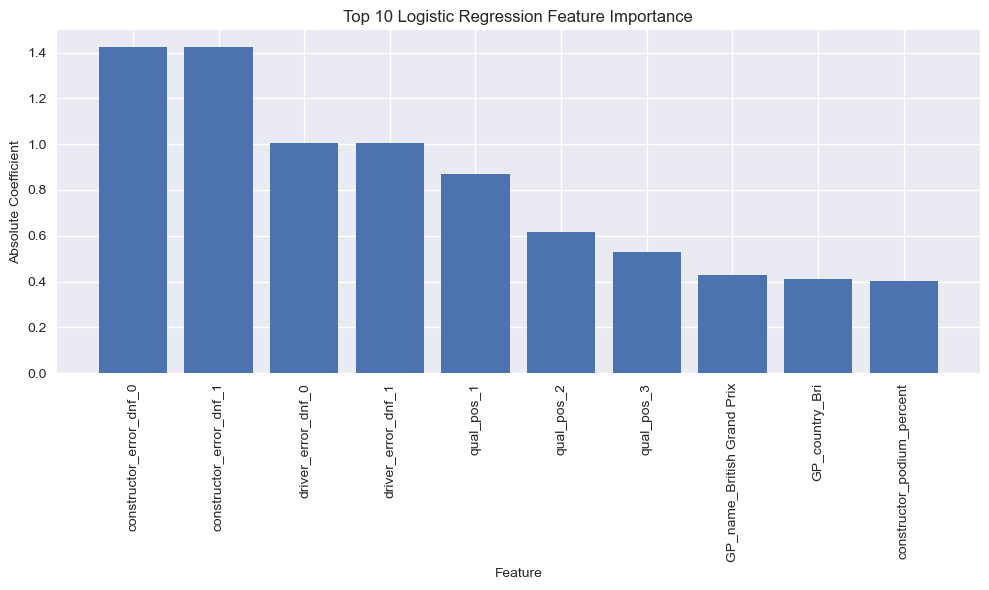

In [177]:
# Get the coefficients and feature names
coefficients = logreg.coef_[0]
feature_names = np.array(X_train.columns)  # Assuming you have named columns in your training data

# Calculate the absolute coefficients for importance
absolute_coefficients = np.abs(coefficients)

# Get the indices of the top N features
top_n = 10  # Change this to the number of top features you want to show
top_indices = np.argsort(absolute_coefficients)[::-1][:top_n]

# Plot the feature importance for the top N features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_indices)), absolute_coefficients[top_indices], tick_label=feature_names[top_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title(f'Top {top_n} Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

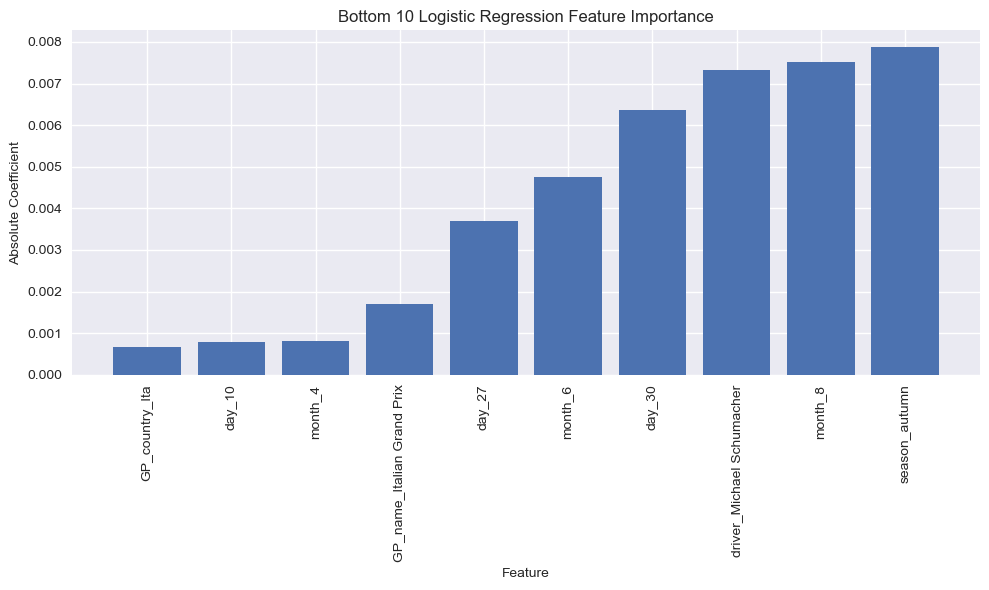

In [178]:
# Get the coefficients and feature names
coefficients = logreg.coef_[0]
feature_names = np.array(X_train.columns)  # Assuming you have named columns in your training data

# Calculate the absolute coefficients for importance
absolute_coefficients = np.abs(coefficients)

# Get the indices of the bottom N features
bottom_n = 10  # Change this to the number of bottom features you want to show
bottom_indices = np.argsort(absolute_coefficients)[:bottom_n]

# Plot the feature importance for the bottom N features
plt.figure(figsize=(10, 6))
plt.bar(range(len(bottom_indices)), absolute_coefficients[bottom_indices], tick_label=feature_names[bottom_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title(f'Bottom {bottom_n} Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()


# Report

### 1. Introduction with Value Based Problem Statement<a id="part10.1"></a>

In the electrifying world of motorsports, where adrenaline, technology, and competition converge, Formula 1 stands as the pinnacle of innovation and performance. Beneath the roar of engines and the glamour of victory podiums lies a rich reservoir of data waiting to be explored. Welcome to a journey that delves into the heart of Formula 1 through the lens of data wrangling as we navigate the twists and turns of raw data to uncover the hidden stories that drive the sport.

Formula 1 races is not all about speed, there are many other factors at play such as team strategy, engineering excellence, and human endeavor. Within this high-speed theater, data plays an indispensable role, capturing every nuance of a race weekend – from practice sessions and qualifying laps to the race itself. Variables suchas driver's psychological state, constructor reliability, driver performance metrics, and weather conditions – all these variables intertwine to determine the outcome of a race. Data serves as the bridge between the driver's instincts and the engineers' calculations, offering insights that often remain invisible to the casual observer.

In this report, we embark on a data wrangling expedition that focuses on a captivating aspect of Formula 1 racing. Our objective is to wield the power of data wrangling techniques to transform raw, disparate data into a coherent, insightful narrative and the use the data prepared to test machine learning models to examine how well the data has been wrangled.

Fasten your seatbelts as I showcase my proficiency in various data wrangling techniques, ranging from data cleaning to feature engineering and as we uncover hidden patterns and insights in the data.

### 2. Problem Formulation <a id="part10.2"></a>

Firstly, I will be walking through the problem formulation where I will highlight the process of loading and exploring the data, how I understood the data and I will be ending this section with my prediction problem and the reasons why I chose this prediction problem.

##### 2.1 Loading and Exploring Tables <a id="part10.2.1"></a>
The data that we had recieved were in the form of CSV files on Excel notebooks. In total, we had recieved 13 CSV files that had different types of information. The types of data that we recieved included information about race results, driver information, constructor information, details of races and circuits and laptimes and pitstop times. At first, I felt overwhelmed as we had so many files and I had to narrow down my focus to a few tables which I would use to continue with.

In order to have a easier time choosing the right tables to work with, I decided to explore the individual tables in greater detail. Along with the CSV files, we had also recieved a txt file that documented the data dictionary of each of the CSV files. I thought that the data dictionary would play a vital part as part of my table exploration process as the data dictionary will help viewers of this project understand the context of each table in better detail. I wanted to display the information for the data dictionary for the tables along with other information of the table so I had to import the data dictionary with the CSV files into the Jupyter Notebook. However, all the data dictionary information for all the tables were cramped into one txt file and this would not be viable as I did not want to overwhelm viewers with so much information at once when displaying the data dictionary. Some viewers might also want to see specific information and I did not want them to be wasting their time searching for that information. Hence, I though that it would be more effective if I split the data dictionary into seperate files for the data dictionary of each table. I manually created 13 seperate data dictionaries for each table in seperate txt files. 

Now that I had all the resources I needed, I proceeded to import the CSV files and the txt files into the Jupyter notebook. Instead of just displaying the information of the tables and the data dictionaries, I decided to make the user experience more interacting by including buttons for each table. 

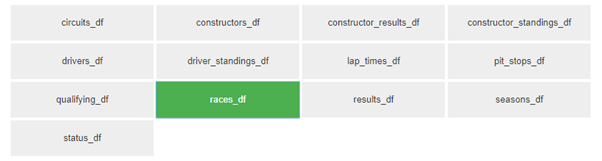

The image above shows the buttons. Green signifies the button is currently selected. 

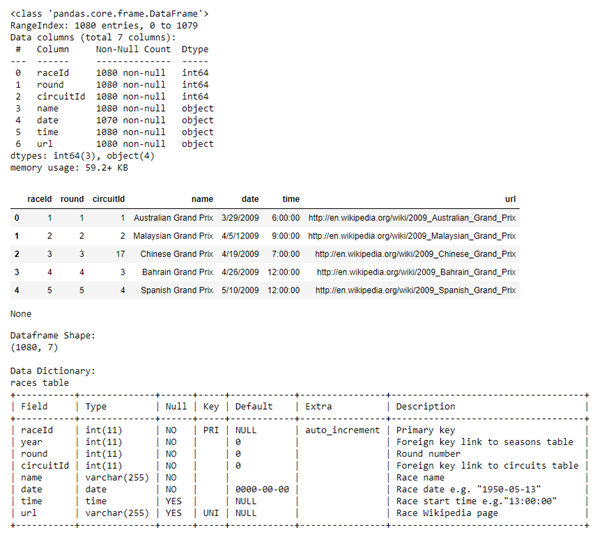

The picture above shows the types of information that the user will be able to view when they press each button. The information include the information of the dataframe, the first 5 rows of the dataframe, the shape of the dataframe and the data dictionary of the table that the dataframe was made from.

##### 2.2 Data Understanding <a id="part10.2.2"></a>

After exploring the tables, I got a clearer idea of the different types of data and the types of data in each of the tables. I love watching formula 1 and I have been a follower of formula 1 for many years now so I had no problem understanding what the columns for each the tables had values for. I identified that the most important table was the results table as it was the fact table had foreigns that could link it to most of the tables. The rest of the table had variables that could affect the results of a race like the status table had information of the different events that happened in the race like 'finished' or 'accident' and these information affect the results of the race.

##### 2.3 Prediction Problem <a id="part10.2.3"></a>

The prediction problem that I based my assignment on was **"Will the driver have a podium finish in the following race?"**. A podium finish refers to the driver finishing in the top 3. With that, I hope to understand the complex interactions of factors that affect podium success. The key to solving the prediction problem is to build features that encompass a driver's previous performance, constructors' previous performance, drivers’ particulars, drivers’ starting position, and other variables that affect race results. The tables that I decided to use were the results, races, drivers, constructors, laptimes and circuits tables.

Since there are only two answers for this prediction problem; the driver will finish in the top 3, or the driver will not finish in the top 3, this prediction problem is identified as a classification problem. Since I had already done a regression problem for the first assignment, I wanted to challenge myself and expand on my data wrangling skillsets by performing data wrangling on a new type of problem. 

### 3. Data Wrangling on Multiple Tables <a id="part10.3"></a>

##### 3.1 Data Cleaning <a id="part10.3.1"></a>

Before performing any data wrangling, I decided to perform data cleaning to ensure a smoother data wrangling process subsequently. Firstly, I identified that tables had a string "/N" as a placeholder for some of the cells of the tables. Hence, in order to properly identify the number of null values for each of the tables, I replaced the "/N" with null so that Python will be able to return to be the proper number of null values in each of the tables. 

To make the process faster, I identified some of the columns that I would remove during subsetting then I would not need to clean those columns.

###### Races Table

I decided to clean the date column as I had to use to extract time series features later on. 

Firstly, I found some incorrect values in the date column. Some of the years had a extra one in front of them and were 5 digit values instead of 4.

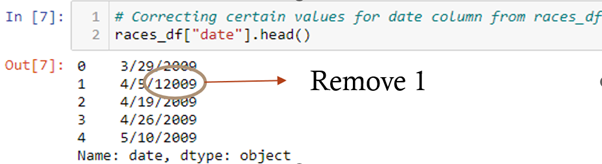

I removed all the extra ones and validated that all the year values were 4 digits.

The, I noticed that the date columns still had 10 missing values. I also could not impute the missing values through the normal methods such as mean imputation as the date column was in datetime format so I decided to inspect the missing values further. 



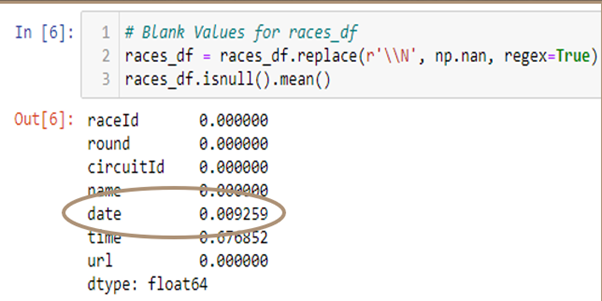

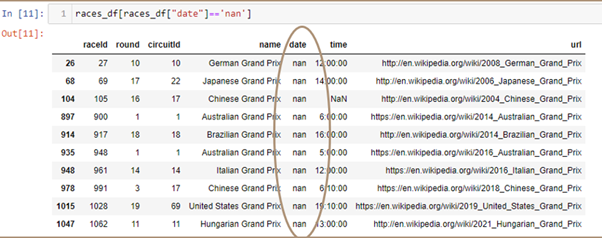

Upon further inspection, I identified a pattern between the missing values and the race date for the next race. The pattern was that the next race happened after 14 days of the races with null dates.
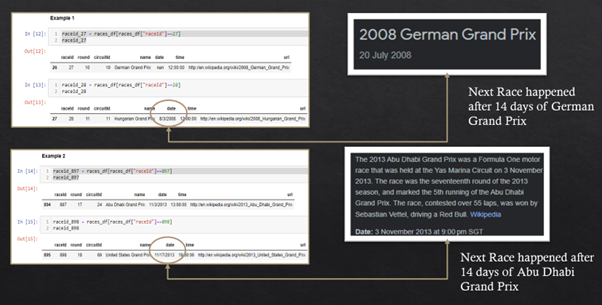

As seen from the two example above, the race with raceId 28 happened on 3 August 2008 and after researching online, I found that the 2008 german grand prix with raceId 27 happened on 20 July 2008. For the next example, the race with raceId 898 happened on 17 November 2013 and from my online research I found that the Abu Dhabi race with raceId 897 happened on 3 November 2013. Both these examples show that there were gaps of 14 days between the races.

I validated this pattern for all 10 null values in the date column and except one of the values followed this pattern.

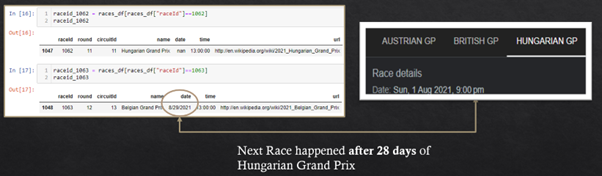

The race with raceId 1063 happened on 29 august 2021 but the race before that with the null date value happened on 1 august 2021 which is a gap of 28 days. Hence, when filling in the missing values, I added a special condition for this null value.

###### Results Table
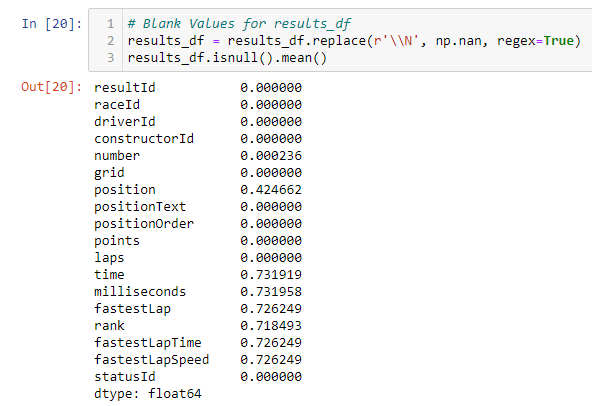

There were null values for the milliseconds column but I had decided to use it later on for feature creation. To fill the missing values of this column, I decided to use the laptimes_df which had the laptimes in milliseconds for each lap for each driver for each race. However, for the milliseconds column in the results table, I need the total milliseconds each driver took to complete each complete race. For this I had to use grouping to sum the milliseconds for each raceId of each driverId. I created a new dataframe for the sum of the milliseconds and finally merged it back to the results table while dropping the existing milliseconds column with null values.

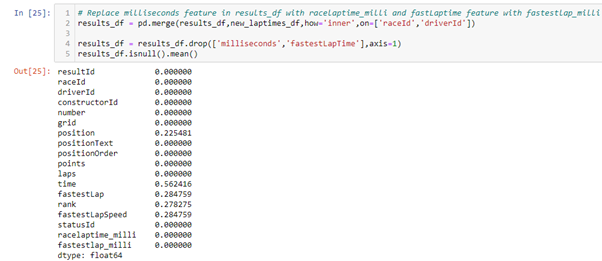

The picture above shows the null values for the new results table and as seen at the bottom, there are no null values for racelaptime_milli which is the column for racelaptime. The only disadvantage that I noticed when doing this is that the number of rows for results decreased from 25 399 to 9717 and this was because the laptimes table was missing data for many races, mostly the races before the year of 1996. However, on the flip side, I ensured that my dataframe would newer data for more accurate predictions.

when inspecting the positiontext column, I noticed an incorrect value.

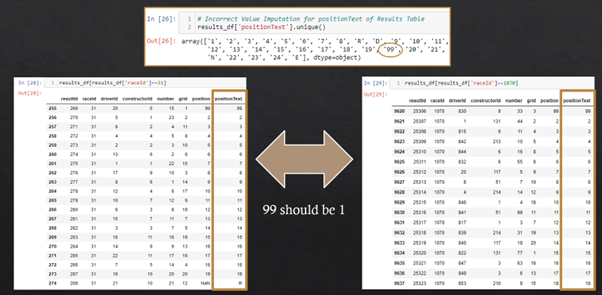

There were values for '99' and this is wrong as Formula 1 has never had 99 drivers. When looking at the raceIds with these values, I consistently say that '99' was placed instead of '1' as highlighted by the two examples above. I then replaced all the '99' values with '1'.

For the other tables, there was not much data cleaning required, I just had rename some columns for easier understanding as there were columns with same names across different tables but the columns had differing purposes.

##### 3.2 Subsetting of Individual Tables <a id="part10.3.2"></a>

The main goal of subsetting is to remove the columns that are not required. For this I removed the columns that had no relation my prediction problem and would not help the accuracy of the model in any way. An example of an unnecesary column were the url columns that could be found in multiple tables that just contained links to wikipedia pages. Also subsetting before merging would improve performance as there would be less columns to merge.

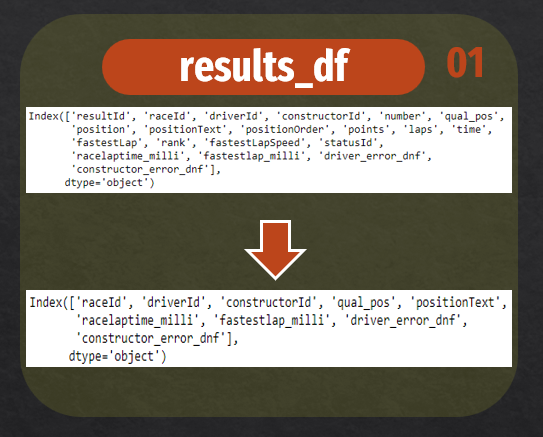

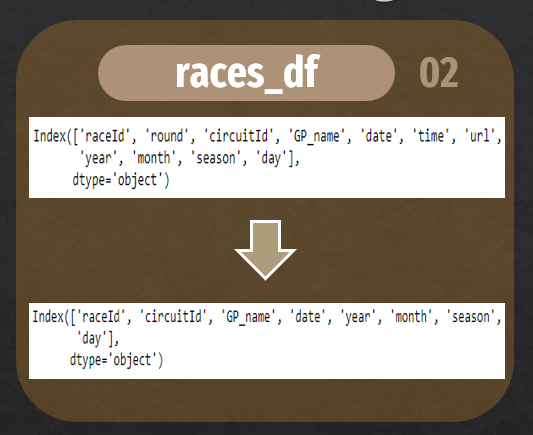

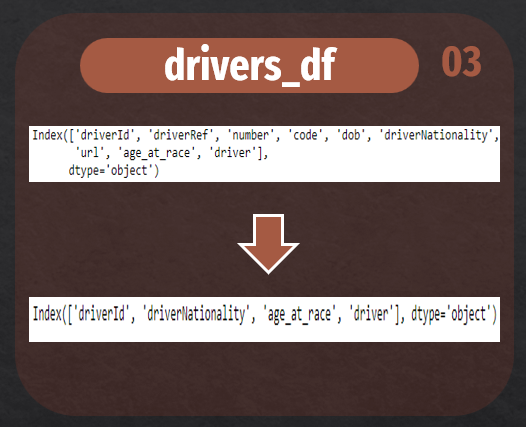

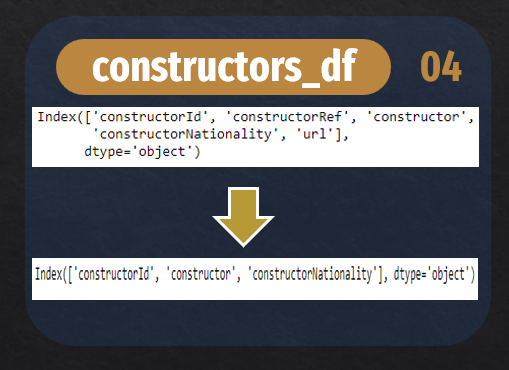

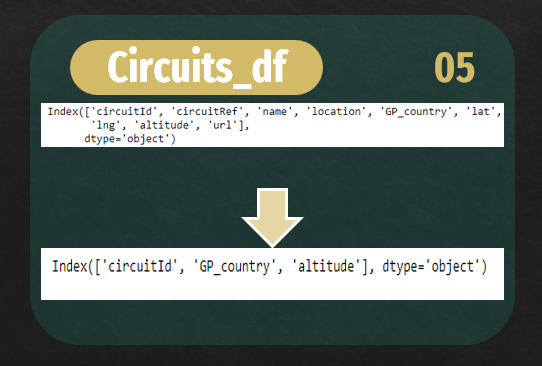

##### 3.3 Merging Dataframes <a id="part10.3.3"></a>

For merging, I used inner join when merging the tables together as I wanted the rows that have matching values in both tables being joined. The order of the tables being joined also matters as the DataFrame that comes first in the operation will act as the base for the join, and the matching will be performed based on the specified columns or index. As identified earlier while exploring the tables, results table is the fact table so that was the dataframe that came first and I merged it with the drivers table first as my prediction problem focuses on drivers. Also, the results table had the foreign for most of the tables so it had to act as the base. Then I merged races as I was predicting the driver getting a podium for the next race so the raceId was important and subsequently I merged the constructors and circuits tables. 

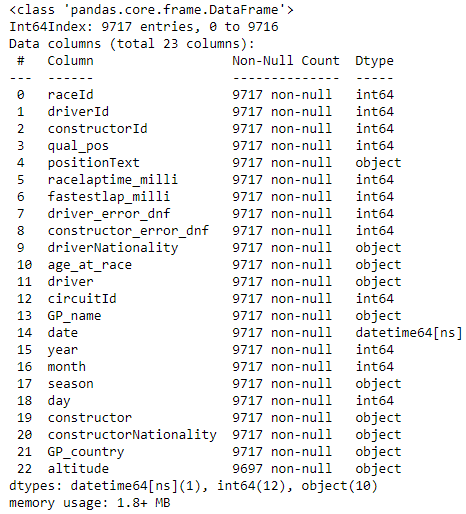

The merged dataframe had 23 columns and 9717 rows.

##### 3.4 Feature Creation and Extraction <a id="part10.3.4"></a>

For the feature extraction, I extracted important features from the date column such as year, month and day. Additionally, I extracted season from the month column and I thought that this column would be important as different seasons have different temperatures and temperatures can greatly affect car performance in a variety of ways, one being the engine oil temperature. 

For the feature creation, I used the existing fetures to create new features using techniques such as mathematical calculations etc. 

__New Features Created:__ 

> age_at_race<br>
Explanation:
>>  Age of the driver at time of the race; obtained by subtracting the date of the race with the date of birth of the driver. Experience may affect race results. 

> driver<br>
Explanation:
>>  Full driver name; obtained by concatenating driver forename and surname.

> driver_error_dnf<br>
Explanation:
>>  Binary column with 0 indicating driver did not finish due to driver error and 1 indicating driver finished. Creating by looking through the conditions using the status table.

> constructor_error_dnf<br>
Explanation:
>>  Binary column with 0 indicating constructor did not finish due to car problems and 1 indicating constructor finished.

> driver_home<br>
Explanation:
>>  Binary column checking if driver is racing in his home country; Made by cross checking driver nationality and race country. Driver might be more motivated to win at his home country as he might have more fans there.

> constructor_home<br>
Explanation:
>>  Binary column checking if constructor is racing in its home country; Made by cross checking constructor nationality and race country. Constructor might be more motivated to win at its home country so they will ensure the cars in pristine condition.

> podium<br>
Explanation:
>>  Binary column checking if the driver got a podium at the particular race. 1 if the driver got podium, 0 otherwise. 

##### 3.5 Grouping <a id="part10.3.5"></a>

I decided to do grouping to extract the data for the previous races. At first, I was not using data from the previous race and I was also using data from the current race. Hence, the model score was unfair as the model already knew the answer to the prediction. In other words, there was data leakage occurring which was undesirable. My teacher advised me to extract data for the previous races to ensure fairness and to allow my model to properly predict the results. Since I wanted to extract data for the previous race, I first had to sort the dataframe in ascending order of date.

> prev_laptime<br>
Explanation:
>>  I decided to obtain the time the driver took to complete the previous race as lap time can affect the results of the race. I obtained this by using the racelaptime_milli column I created in the results table when doing the data cleaning of the results table. The racelaptime_milli column contained the values for the time taken for the driver to finish the current race. 

> driver_finish_percent<br>
Explanation:
>>  This is the percentage of the number of races the driver has finished out of the total number of races he has partcipated in till the previous race. To create this I had to use the cumulative function to count the number of races only till the previous race. The first row of this column is 0 as there is no data for before the first row.

> constructor_finish_percent<br>
Explanation:
>>  This is the percentage of the number of races the constructor has finished out of the total number of races it has partcipated in till the previous race. The logic for the creation of this column is the same as the one for driver_finish_percent.

> driver_podium_percent<br>
Explanation:
>>  This is the percentage of the number of races the driver has gotten a podium in out of the total number of races he has partcipated in till the previous race.

> constructor_podium_percent<br>
Explanation:
>>  This is the percentage of the number of races the constructor has gotten a podium in out of the total number of races he has partcipated in till the previous race.

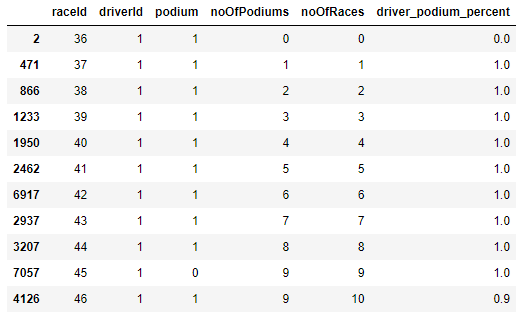

The picture above shows the top 11 rows for driverId 1, as seen the driver kept getting podiums but did not get a podium for the tenth race. That is why the driver_podium_percent column shows 1.0 (100%) till the tenth row but the percentage dropped in the eleventh row to 0.9 as out of the first 10 races, he won 9 races. Also notice the value for the first row is 0 as there is no data before the first row.

### 4. Data Exploration With Target Column <a id="part10.4"></a>

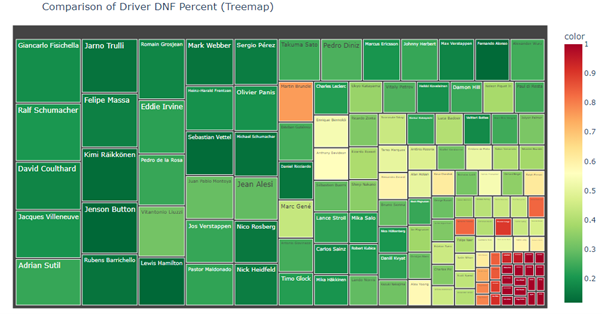

The treemap shows the percentage of races the driver did not finish obtained from the driver_finish_percent column. The drivers with lower percentages are coloured green while the drivers with higher percentages are coloured red to signify that those with higher percentages have less reliability.

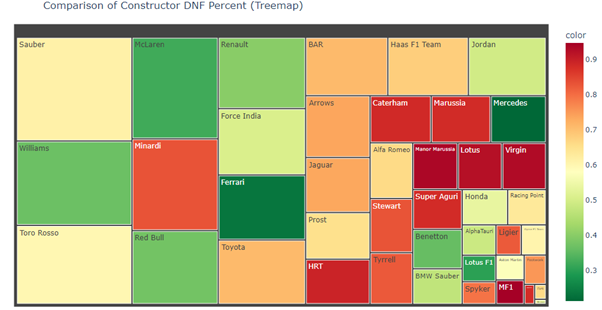

The treemap shows the percentage of races the constructor did not finish obtained from the driver_finish_percent column. The constructors with lower percentages are coloured green while the constructors with higher percentages are coloured red to signify that those with higher percentages have less reliability.

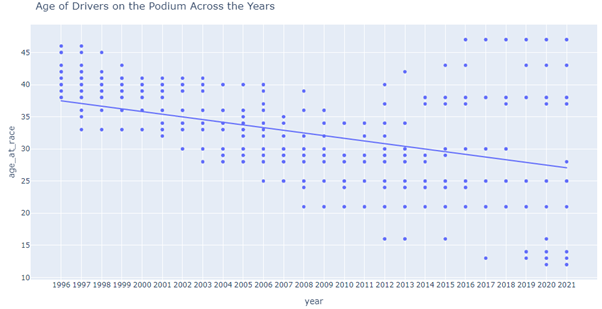

The following scatterplot shows the age of the drivers who won the podium, showing a downward sloping trend line across the years. This means that more younger drivers are obtaining podiums in the recent races.

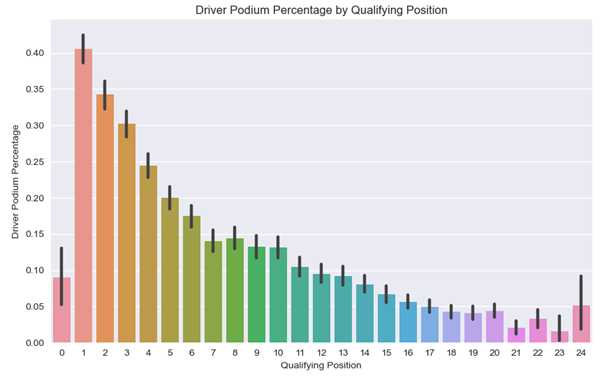

The bar chart shows the comparison between the percentage of the driver winning a podium and their starting position to investigate how important starting position is. As seen from the bar chart, there is a downward slope which means that the better the starting position, the higher the chances of getting the podium.

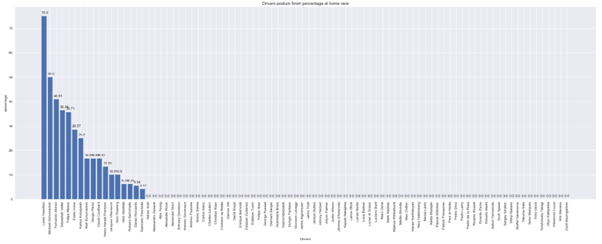

The bar chart compares the driver_podium_percent for each driver when they race at their home country to investigate the effects of racing at home countries.

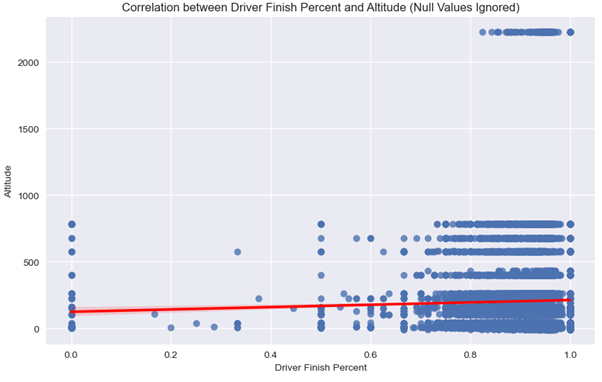

The scatterplot investigates the correlation between the percentage of the driver finishing the race and the altitude during the race. I wanted to investigate this as when altitude increases, the temperature drops and temperature can affect the car performance. In other words, altitude may cause car problems.

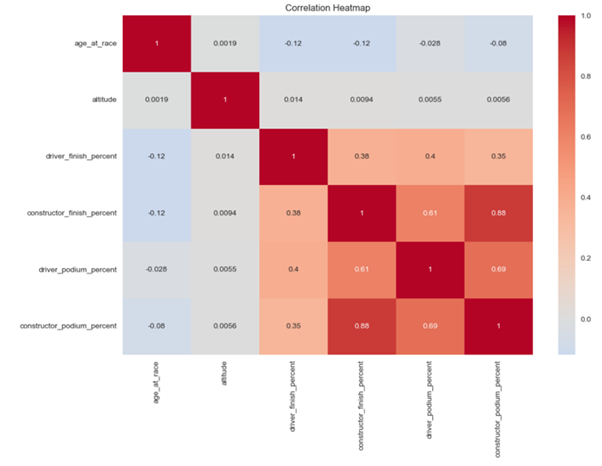

I explored the correlation of the numerical variables using the heatmap above. The features that have the highest correlations are constructor_podium_finish and constructor_finish_percent.

### 5. Train-Test Split <a id="part10.5"></a>

I split the merged dataframe into 2 dataframes, train and test with 70% of the data going to the train dataframe and 30% of the data going to test dataframe. I also dropped the podium column when creating these dataframes as this was the target variables that the prediction needed to be carried out on.

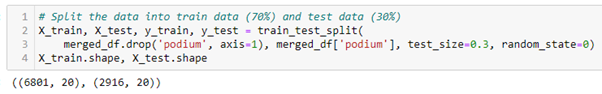

### 6. Data Transformation <a id="part10.6"></a>

##### 6.1 Missing Value Imputation <a id="part10.6.1"></a>

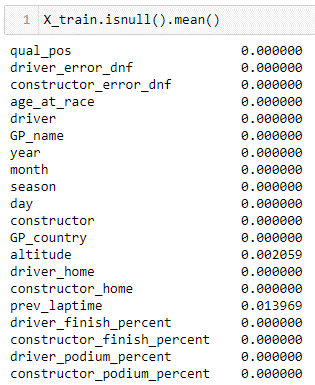

The picture above the number of null values that was remaining. There are only missing values for altitude and prev_laptime which are both numerical columns. Hence, the missing values can be imputed using pipelines.

Imputation Methods Tested: 

> Median Imputation<br>
Explanation:
>> The median is the middle value when data is sorted, and it's less influenced by outliers compared to the mean. Median imputation is more robust to outliers because it's not affected by extreme values, making it a better choice when dealing with datasets that have outliers.

> Mean Imputation<br>
Explanation:
>> Mean imputation involves filling missing values with the mean (average) of the non-missing values in the same column. While mean imputation is simple to implement, it can be sensitive to outliers. Outliers have a disproportionate effect on the mean, potentially pulling it in a direction that doesn't reflect the central tendency of the majority of the data. This can lead to distorted imputed values, making it less suitable when dealing with outliers.

> Arbitrary Imputation<br>
Explanation:
>>  Arbitrary imputation involves filling missing values with a constant. It did not work well as I was replacing values in columns which had large number ranges. Hence, the values that I were filling up might not have been the best but it was also very hard to fill the missing values by a constant.

Apart from using one method on both columns at once, I also tested out a hybrid of using 2 seperate methods for each of the column. However, I got the best results when using just 1 method for both columns. 

##### 6.2 Categorical Variable Encoding <a id="part10.6.2"></a>

The primary purpose of categorical encoding is to transform categorical variables into a numerical format as most machine learning algorithms can only process numerical data.

Encoding Methods:<br>
> One-Hot encoding<br>
Explanation:
>> One-hot encoding transforms each category in a categorical variable into a separate binary column, where each column represents the presence (1) or absence (0) of that category for a particular observation. I used this encoding method on the columns which had a low cardinality such as the binary columns which only had a cardinality of 2. Then, the dimensionality would not increase too much.

> One-Hot encoding (Frequent Categories)<br>
Explanation:
>> This approach focuses on encoding only the most frequent or top categories, rather than encoding every individual category. I used this encoding method on the columns which had higher cardinality and the ones which would not have performed well with one-hot encoding.

> Ordered Ordinal Encoding<br>
Explanation:
>> I used ordered ordinal encoding for variables that had a order like the year, month and day columns.

> Target Mean Encoding<br>
Explanation:
>>  This is a method used to transform categorical variables into numerical values based on the mean of the target variable (or the dependent variable) within each category. However, I did not use it for my classification problem as the target variable only has 1s and 0s.

I used one-hot encoding for frequent categories in the end as I started to get errors for my other encoding methods at the last minute. One-hot encoding for frequent categories is extremely versatile and can be used to handle many different types of columns.

##### 6.3 Numerical Variable Transformation <a id="part10.6.3"></a>

At first, I performed numerical transformation tests on all the numerical variables. However, after further consideration, I decided to only transform the altitude column. Since my other numerical columns had historical data for previous races, I thought that transforming those columns will lead to inaccurate results. This is because the values will totally change after applying the transformations.

> Altitude<br>
Transformations that do not work:
>>  Logarithmic Transformation (Altitude has zero and negative values), Reciprocal Transformation (Altitude has zero and negative values), Box-cox Transformation (Altitude has negative values)<br>

> Altitude<br>
Transformations that do work:
>>  Yeo-Johnson Transformation (Best Method), Power Transformation

Before Yeo-Johnson Transformation:

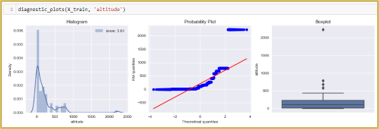

After Yeo-Johnson Transformation:

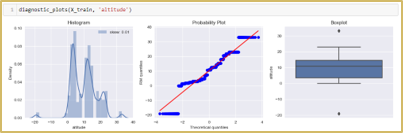

As seen from the histograms, altitude has become less skewed after Yeo-Johnson transformation.

##### 6.4 Dealing With Outliers <a id="part10.6.4"></a>

I did not deal with the outliers of the columns with historical data as the outliers for those columns could be useful and I felt it was necessary to keep them. However, I did not see the need to keep the outliers of altitude.

> Altitude<br>
Winsorization:
>>  Some Outliers still present.

> Altitude<br>
Capping:
>>  All outliers gone.

Before Capping:
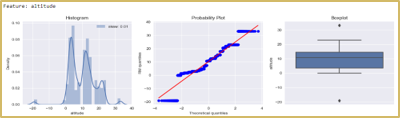    

After Capping:
    
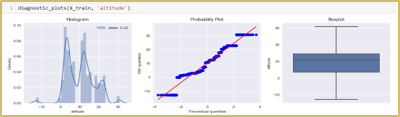    

##### 6.5 Binning <a id="part10.6.5"></a>

I performed binning on the numerical variables. The 2 different methods I tested were equal-width discretization and equal-frequency discretization. However, I got better results when using equal-frequency discretization as the bars for most of the columns are around the same height with each other. However, the only disadvantage with using this approach is that there is no configuration options.

After Binning:
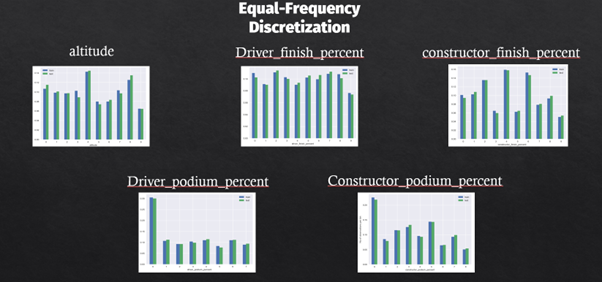

##### 6.6 Scaling <a id="part10.6.6"></a>

The purpose of scaling is to ensure that features with different magnitudes and units do not disproportionately influence the learning algorithms. This was very important for my dataset as the difference of scales between my numerical variables were extremely large. For example, the driver age column only had 2 digit values but the prev_laptime column had data in milliseconds so the values in that column were extremely large.

I had tested a few scaling methods but the method I decided to go with is Standardisation why is a scaling method that is used very commonly. Standardization is the process of centering the variable at zero and standardizing the variance to 1. After scaling, the scale has reduced in size significantly and the variables are sharing the same scale. 

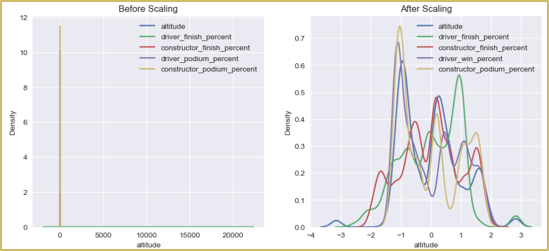

##### 6.7 Polynomial Expansion <a id="part10.6.7"></a>

Polynomial Expansion is a feature engineering technique that is used to create new features by raising the existing features to various powers. It is usually used to improve models and it does it in several ways:
1) Polynomial expansion allows the model to capture and learn more complex, non-linear relationships between the features. This enables the model to better represent and fit non-linear patterns in the data.
2) Polynomial expansion increases the flexibility of the model by introducing a wider range of functional forms. It allows the model to fit the data more closely and make more accurate predictions.

However, when I performed polynomial expansion on my dataset, the accuracy of the train dataset increases alot but the accuracy of the test dataset decreases. From a difference of just 1% between the accuracy of train and test, the difference increased to about 9% after a polynomial expansion of degree 2.

This shows overfitting which is not desirable which is why I decided not to include it for further testings.

### 7. Machine Learning Model <a id="part10.7"></a>

For the modelling, X_train dataset had 6801 rows and 99 columns. X_test dataset had 2916 rows and 99 columns.

##### 7.1 Naive Baseline Model <a id="part10.7.1"></a>

The naive baseline model serves as a basic reference point for evaluating the performance of more complex machine learning models. It's a simple and straightforward approach that sets a benchmark for comparison. The primary purpose of a naive baseline model is to provide context for determining whether your more sophisticated models are adding value by outperforming this basic approach. The naive baseline model attained a score of around 85% for both X_test and X_train.

##### 7.2 Logistic Regression Model <a id="part10.7.2"></a>

The logistic regression model is my actual model. Logistic Regression is a fundamental and widely used statistical method for binary classification, where the goal is to predict a binary outcome (0 or 1) based on input features. D It's particularly suitable for problems where the dependent variable represents a categorical outcome that can be transformed into a binary form. i thought that this model best fit my criteria for this assignment as I was expecting a binary outcome (Driver in podium or driver not in podium). The logistic regression model asstained a score of around 92% for X_train and 91% for X_test.

My actual model has beaten the naive baseline model by a decent margin which shows that tha data wrangling and data transformations have been done well. 

### 8. Summary and Further Improvements <a id="part10.8"></a>

At the start of this project, I was extremely excited as I am a really big fan of F1 and this assignment was based on formula 1. 

The goal is to forecast the podium positions for Formula 1 races, and the Introduction, Data Wrangling, Data Cleansing and Transformation, and Machine Learning Model sections have provided a solid grasp of how to do that. Each section has provided important insights that will form the basis of the data-driven strategy for solving this issue.

The value-based problem statement was provided in the introduction, which also piqued readers' curiosity in the world of racing. The significance of accurately projecting podium outcomes was emphasized for many parties, including teams, bookies, commentators, and fans. This indicates how our study can be used to the F1 industry.

To conduct this, I used a variety of information such as the driver information, constructor information and the past results information. The dataset's reliability was greatly improved through the use of replacing missing data and taking care of outliers. 

In the end, the complex model's (logistic regression) was accessed by comparing it with a simple baseline model and the actual model beat the baseline model by a decent margin indicating that the data wrangling and data tranformations were done well. 

Something that surprised me was the relative feature importance. I did not expect a feature related to constructor to have the highest relative importance.

### Possible Future Improvements

#### Conducting More Tests
I could have conducted more tests and I could have found out about different methods working well with one another that I had previously not known about.

#### Feature Engineering
Improved performance can be attained by continuously growing and improving the set of features used in the model. It is possible to find hidden patterns by experimenting with combinations of existing features or by creating brand-new features from the given data.
